# Importamos librerías

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats
import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def load(path, info = True):
    
    pd.set_option('display.max_rows', 500)
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)
    
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")

            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            print((read.isna().sum() / read.shape[0]).sort_values(ascending = False))

            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values/df.shape[0]    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def CalcOutliers(df_num): 
    '''
    
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return


In [3]:
patient_data = load('/content/drive/MyDrive/Lab_datos/Patient_Survival/patient_data.csv',True)

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 91713 Column: 85 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 7 
 ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] 

Integer Variables: 
 # of Variables: 7 
 ['encounter_id', 'patient_id', 'hospital_id', 'elective_surgery', 'icu_id', 'apache_post_operative', 'hospital_death'] 

Float Variables: 
 # of Variables: 71 
 ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1

In [4]:
patient_data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
from sklearn.model_selection import train_test_split
# Separating train, test data
# get all the features
features = [feat for feat in patient_data.columns if feat !='hospital_death']

X = patient_data[features] # feature set
y = patient_data['hospital_death'] # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test datasets dimensions
X_train.shape, X_test.shape

((73370, 84), (18343, 84))

In [6]:
X_train = X_train.drop('Unnamed: 83',axis = 1)

In [7]:
resumetable(X_train)
# we can observe that the patient_id is unique to each of the patients

Dataset Shape: (73370, 83)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,encounter_id,int64,0.000000,73370,66154,114252,119783,16.16
1,patient_id,int64,0.000000,73370,25312,59342,50777,16.16
2,hospital_id,int64,0.000000,147,118,81,118,6.34
3,age,float64,0.046272,74,68.0,77.0,25.0,5.96
4,bmi,float64,0.037181,30501,22.73,27.42,31.95,14.18
5,elective_surgery,int64,0.000000,2,0,0,0,0.69
6,ethnicity,object,0.015061,6,Caucasian,Caucasian,Caucasian,1.16
7,gender,object,0.000273,2,M,F,F,1.00
8,height,float64,0.014420,376,180.3,160.0,172.7,5.60
9,icu_admit_source,object,0.001254,5,Floor,Floor,Accident & Emergency,1.55


In [8]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,73370.0,65659.225092,37759.978432,1.000000,32995.250000,65807.000000,98277.500000,131051.000000
patient_id,73370.0,65480.506079,37831.859595,1.000000,32765.250000,65274.500000,98308.750000,131048.000000
hospital_id,73370.0,105.575140,62.931266,2.000000,47.000000,109.000000,161.000000,204.000000
age,69975.0,62.348110,16.787549,16.000000,52.000000,65.000000,75.000000,89.000000
bmi,70642.0,29.174899,8.259896,14.844926,23.632914,27.654669,32.925078,67.814990
elective_surgery,73370.0,0.184067,0.387542,0.000000,0.000000,0.000000,0.000000,1.000000
height,72312.0,169.648778,10.794681,137.200000,162.500000,170.100000,177.800000,195.590000
icu_id,73370.0,508.290432,229.015587,82.000000,369.000000,504.000000,679.750000,927.000000
pre_icu_los_days,73370.0,0.839875,2.509672,-24.947222,0.035417,0.139583,0.412500,159.090972
weight,71205.0,84.022326,25.022951,38.600000,66.700000,80.300000,97.100000,186.000000


In [9]:
y_train.value_counts()

0    67038
1     6332
Name: hospital_death, dtype: int64

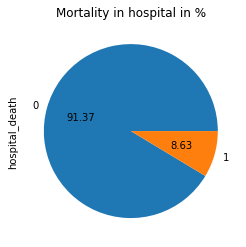

In [10]:
_=y_train.value_counts().plot(kind='pie',autopct="%.2f",title ='Mortality in hospital in %')
# we can see that classes are imbalanced. When we do the modelling part SMOTE
# should be a hyperparameter  

Lets look at all the variables

In [11]:
data = X_train.merge(y_train, left_index=True, right_index=True)

In [12]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
30147,3050,60362,136,52.0,34.833839,0,Caucasian,F,157.4,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
56296,128215,33517,194,21.0,30.824830,0,African American,M,168.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
1974,127207,63753,118,80.0,28.009940,0,Caucasian,M,182.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
25438,110589,40261,136,86.0,22.603878,1,Caucasian,M,190.0,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
79125,20671,11658,103,52.0,32.752149,0,NaN,F,167.6,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1


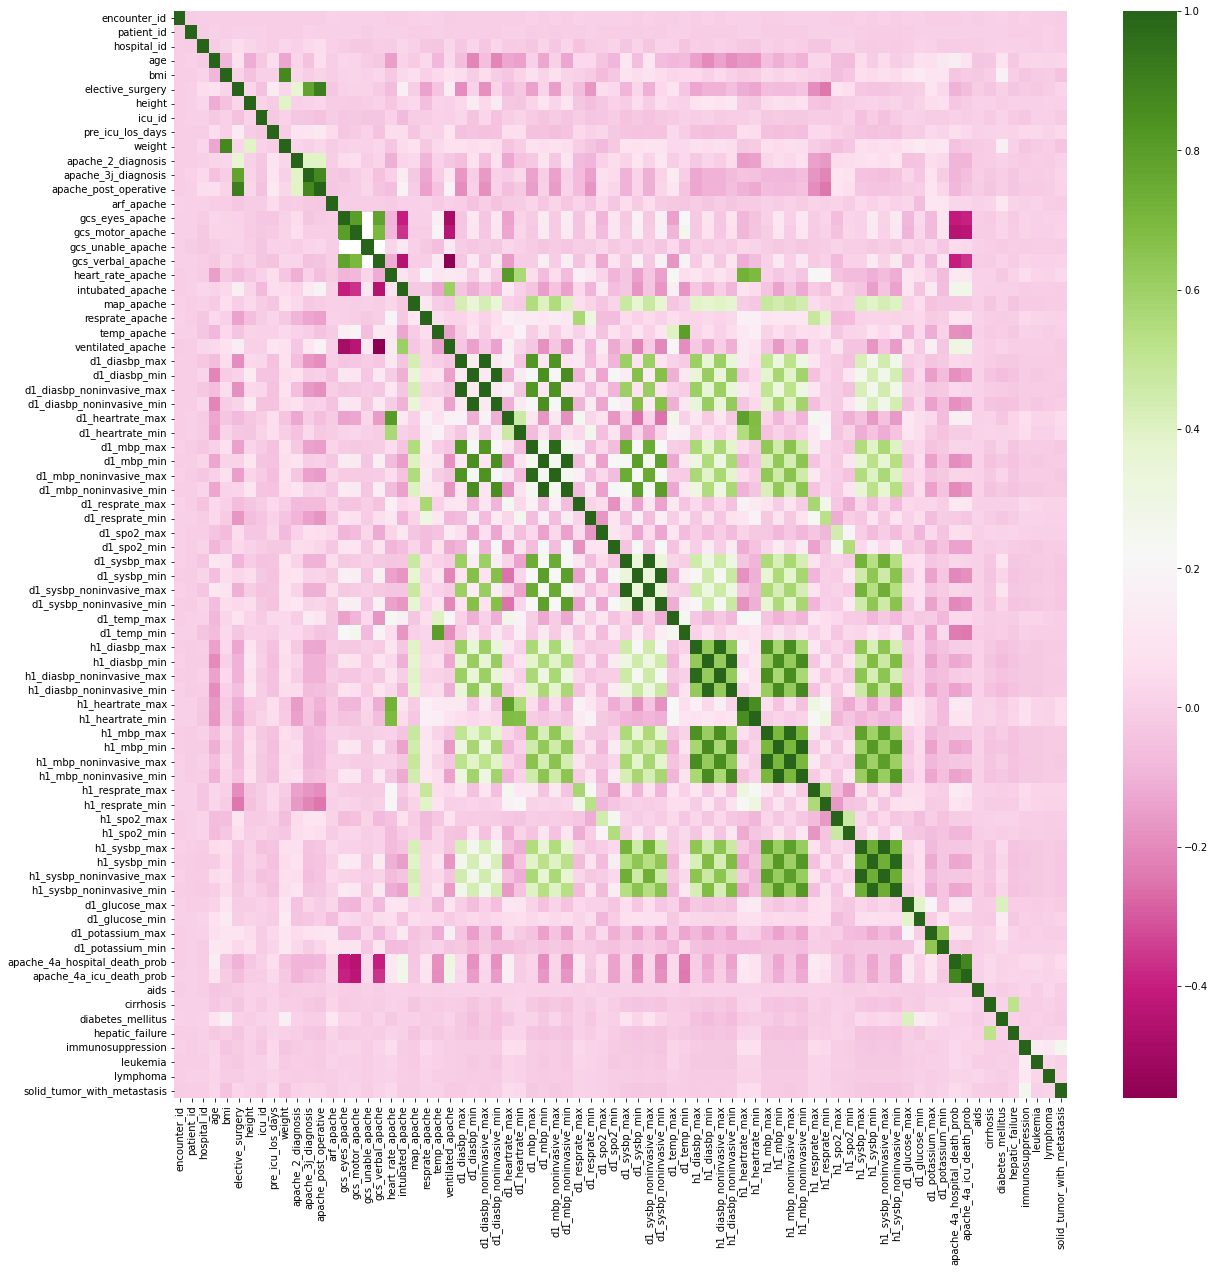

In [25]:
plt.figure(figsize=(20,20))
_=sns.heatmap(data.corr(),cmap='PiYG')


In [26]:
# Apache : Acute Physiology And Chronic Health Evaluation
dict_description={'encounter_id' : 'Unique identifier associated with a patient unit stay',
'patient_id': 'Unique identifier associated with a patient',
'hospital_id': 'Unique identifier associated with a hospital',
'age': 'The age of the patient on unit admission',
'bmi': 'The body mass index of the person on unit admission',
'elective_surgery':'Whether the patient was admitted to the hospital for an elective surgical operation',
'ethnicity':'The common national or cultural tradition which the person belongs to',
'gender':'Sex of the patient',
'height':'The height of the person on unit admission',
'icu_admit_source':'The location of the patient prior to being admitted to the unit',
'icu_id':' unique identifier for the unit to which the patient was admitted',
'icu_stay_type':'string',
'icu_type': 'A classification which indicates the type of care the unit is capable of providing',               
'pre_icu_los_days': 'The length of stay of the patient between hospital admission and unit admission',
'weight' :'The weight (body mass) of the person on unit admission',
'apache_2_diagnosis' :'The APACHE II diagnosis for the ICU admission',
'apache_3j_diagnosis' :'The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission',
'apache_post_operative':'The APACHE operative status; 1 for post-operative, 0 for non-operative',
'arf_apache':' Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis',
'gcs_eyes_apache':'The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'gcs_motor_apache': 'The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'gcs_unable_apache': 'Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation',
 'gcs_verbal_apache': 'The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
'heart_rate_apache': 'The heart rate measured during the first 24 hours which results in the highest APACHE III score',
'intubated_apache': 'Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score',
'map_apache': 'The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score',
'resprate_apache': 'The respiratory rate measured during the first 24 hours which results in the highest APACHE III score',
'temp_apache': 'The temperature measured during the first 24 hours which results in the highest APACHE III score',
'ventilated_apache': 'Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy',      
'd1_diasbp_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_diasbp_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_diasbp_noninvasive_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_diasbp_noninvasive_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_heartrate_max':"The patient's highest heart rate during the first 24 hours of their unit stay",
'd1_heartrate_min':"The patient's lowest heart rate during the first 24 hours of their unit stay",
'd1_mbp_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_mbp_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_mbp_noninvasive_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_mbp_noninvasive_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
'd1_resprate_max':"The patient's highest respiratory rate during the first 24 hours of their unit stay",
'd1_resprate_min':"The patient's lowest respiratory rate during the first 24 hours of their unit stay",
'd1_spo2_max':"The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay",
'd1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay",
'd1_sysbp_max':"The patient's highest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_sysbp_min':"The patient's lowest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
'd1_sysbp_noninvasive_max':"The patient': highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
'd1_sysbp_noninvasive_min':"The patient': lowest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
'd1_temp_max':"The patient:s highest core temperature during the first 24 hours of their unit stay, invasively measured",
'd1_temp_min':"The patient's lowest core temperature during the first 24 hours of their unit stay",
'h1_diasbp_max':"The patient's highest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_diasbp_min':"The patient's lowest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_diasbp_noninvasive_max':"The patient:s highest diastolic blood pressure during the first hour of their unit stay, invasively measured",
'h1_diasbp_noninvasive_min':"The patient:s lowest diastolic blood pressure during the first hour of their unit stay, invasively measured",
'h1_heartrate_max':"The patient's highest heart rate during the first hour of their unit stay",
'h1_heartrate_min':"The patient's lowest heart rate during the first hour of their unit stay",
'h1_mbp_max':"The patient's highest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_mbp_min':"The patient's lowest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_mbp_noninvasive_max':"The patient's :ighest mean blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_mbp_noninvasive_min':"The patient's :owest mean blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_resprate_max':"The patient's highest respiratory rate during the first hour of their unit stay",
'h1_resprate_min':"The patient's lowest respiratory rate during the first hour of their unit stay",
'h1_spo2_max':"The patient's highest peripheral oxygen saturation during the first hour of their unit stay",
'h1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first hour of their unit stay",
'h1_sysbp_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_sysbp_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
'h1_sysbp_noninvasive_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
'h1_sysbp_noninvasive_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
'd1_glucose_max':"The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_glucose_min':"The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_potassium_max':"The highest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
'd1_potassium_min':"The lowest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
'apache_4a_hospital_death_prob':"The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.",
'apache_4a_icu_death_prob':"The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis",
'aids':"Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)",
'cirrhosis':"Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.",
'diabetes_mellitus':"Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.",
'hepatic_failure':"Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.",
'immunosuppression':"Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).",
'leukemia':"Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.",
'lymphoma':"Whether the patient has been diagnosed with non-Hodgkin lymphoma.",
'solid_tumor_with_metastasis':"Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.",
'apache_3j_bodysystem':"Admission diagnosis group for APACHE III",
'apache_2_bodysystem':"Admission diagnosis group for APACHE II",
'hospital_death':"Whether the patient died during this hospitalization"}

AGE

30147    52.0
56296    21.0
1974     80.0
25438    86.0
79125    52.0
Name: age, dtype: float64

Description: The age of the patient on unit admission


Number of Null values:
3395

Value Counts:
67.0    1800
68.0    1763
71.0    1734
72.0    1714
70.0    1652
66.0    1645
65.0    1618
73.0    1578
64.0    1575
69.0    1541
62.0    1540
75.0    1538
74.0    1533
63.0    1524
77.0    1511
60.0    1503
78.0    1498
76.0    1496
61.0    1492
59.0    1452
57.0    1413
79.0    1411
80.0    1396
58.0    1392
56.0    1330
81.0    1325
55.0    1314
83.0    1281
82.0    1266
54.0    1256
53.0    1239
84.0    1238
52.0    1192
85.0    1137
51.0    1069
86.0    1044
50.0     999
87.0     986
49.0     866
88.0     825
48.0     812
89.0     778
47.0     711
46.0     706
45.0     694
44.0     589
43.0     583
42.0     539
41.0     535
40.0     471
36.0     449
38.0     449
34.0     425
35.0     421
39.0     415
37.0     405
33.0     390
30.0     383
32.0     360
31.0     355
25.0     336
26.0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 69975
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


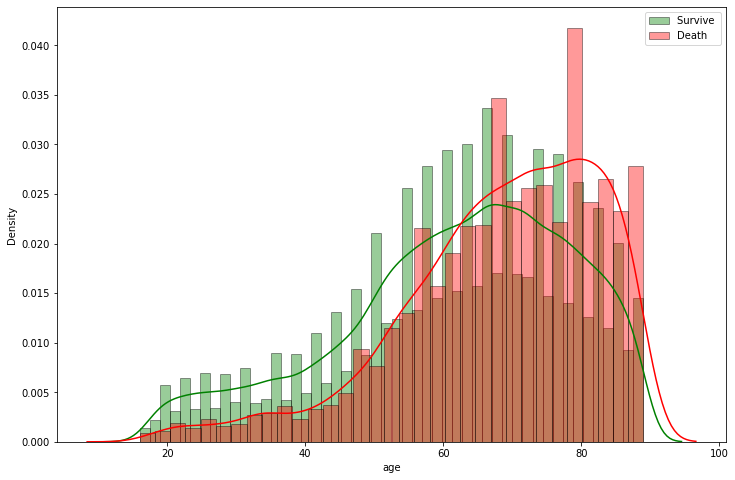

_______________________________________________________________________________
BMI

30147    34.833839
56296    30.824830
1974     28.009940
25438    22.603878
79125    32.752149
Name: bmi, dtype: float64

Description: The body mass index of the person on unit admission


Number of Null values:
2728

Value Counts:
14.844926    357
67.814990    327
24.208110     74
24.017768     68
22.606103     67
            ... 
37.516435      1
25.181884      1
46.017870      1
43.681398      1
30.744918      1
Name: bmi, Length: 30501, dtype: int64

count    70642.000000
mean        29.174899
std          8.259896
min         14.844926
25%         23.632914
50%         27.654669
75%         32.925078
max         67.814990
Name: bmi, dtype: float64


Identified lowest outliers: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Identified upper outliers: 1188
Identified outliers: 1188
Non-outlier observations: 69454
Total percentual of Outliers:  1.7105



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


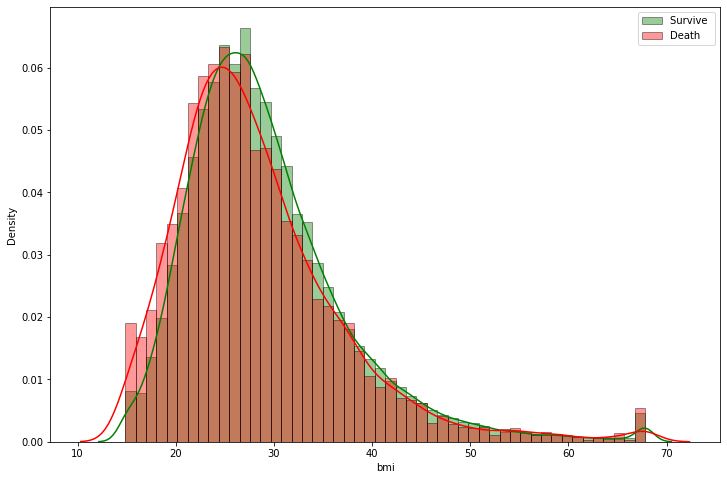

_______________________________________________________________________________
ELECTIVE_SURGERY

30147    0
56296    0
1974     0
25438    1
79125    0
Name: elective_surgery, dtype: int64

Description: Whether the patient was admitted to the hospital for an elective surgical operation


Number of Null values:
0

Value Counts:
0    59865
1    13505
Name: elective_surgery, dtype: int64

count    73370.000000
mean         0.184067
std          0.387542
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: elective_surgery, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 73370
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


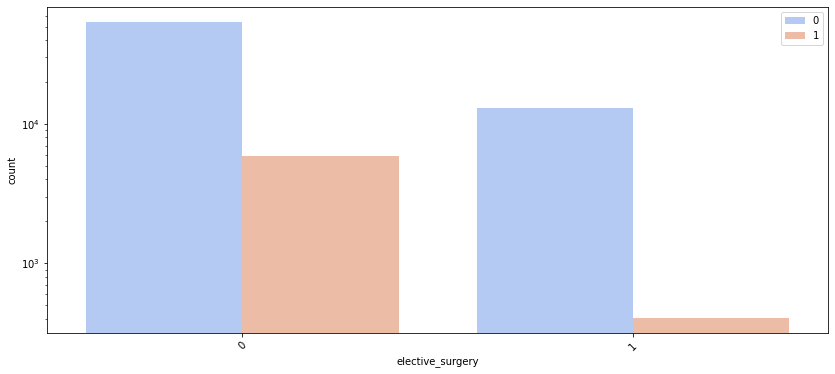

_______________________________________________________________________________
ETHNICITY

30147           Caucasian
56296    African American
1974            Caucasian
25438           Caucasian
79125                 NaN
Name: ethnicity, dtype: object

Description: The common national or cultural tradition which the person belongs to


Number of Null values:
1105

Value Counts:
Caucasian           56548
African American     7656
Other/Unknown        3506
Hispanic             3040
Asian                 879
Native American       636
Name: ethnicity, dtype: int64

count         72265
unique            6
top       Caucasian
freq          56548
Name: ethnicity, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


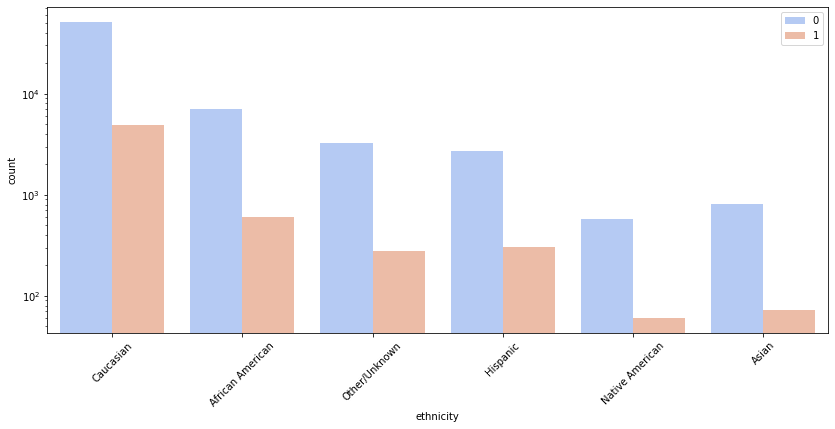

_______________________________________________________________________________
GENDER

30147    F
56296    M
1974     M
25438    M
79125    F
Name: gender, dtype: object

Description: Sex of the patient


Number of Null values:
20

Value Counts:
M    39536
F    33814
Name: gender, dtype: int64

count     73350
unique        2
top           M
freq      39536
Name: gender, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


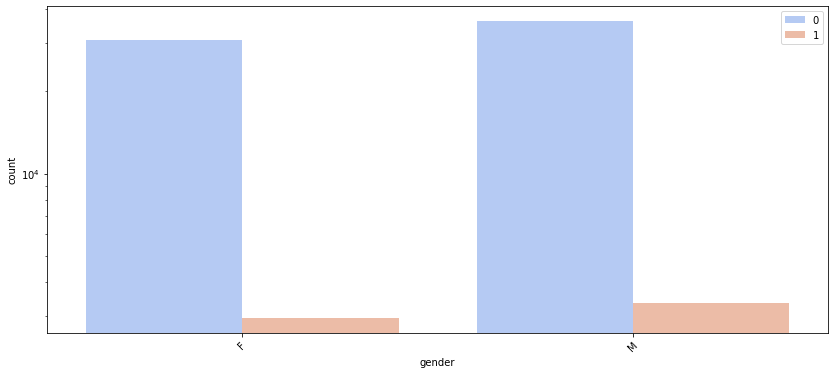

_______________________________________________________________________________
HEIGHT

30147    157.4
56296    168.0
1974     182.9
25438    190.0
79125    167.6
Name: height, dtype: float64

Description: The height of the person on unit admission


Number of Null values:
1058

Value Counts:
167.60    4307
177.80    4249
160.00    4229
165.10    3858
172.70    3857
170.20    3299
162.60    3070
182.90    2943
175.30    2842
180.30    2806
157.50    2679
152.40    2070
154.90    1673
170.00    1590
185.40    1546
188.00    1440
165.00    1437
175.00    1265
180.00    1133
178.00     989
163.00     943
173.00     916
157.00     914
183.00     869
168.00     824
162.50     767
182.80     696
190.50     694
167.00     693
170.10     610
152.00     604
175.20     598
185.00     575
149.90     551
157.40     530
155.00     530
193.00     504
172.00     482
162.00     406
137.20     355
195.59     343
182.00     339
177.00     327
147.30     309
187.90     248
158.00     204
150.00     202
1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

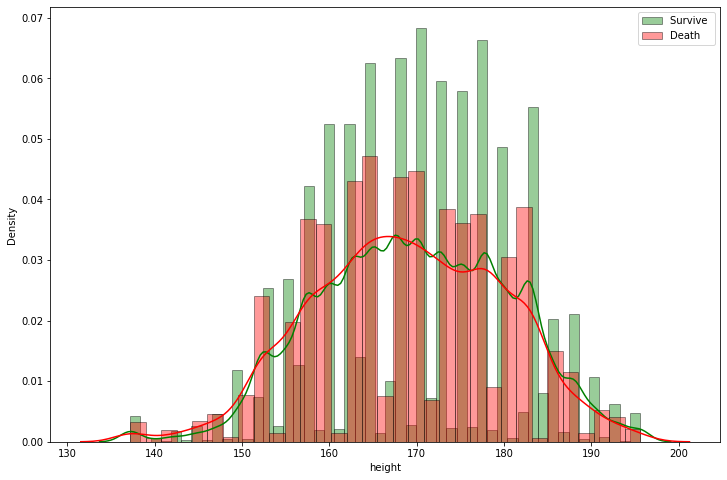

_______________________________________________________________________________
ICU_ADMIT_SOURCE

30147         Accident & Emergency
56296         Accident & Emergency
1974          Accident & Emergency
25438    Operating Room / Recovery
79125         Accident & Emergency
Name: icu_admit_source, dtype: object

Description: The location of the patient prior to being admitted to the unit


Number of Null values:
92

Value Counts:
Accident & Emergency         43176
Operating Room / Recovery    14947
Floor                        12582
Other Hospital                1882
Other ICU                      691
Name: icu_admit_source, dtype: int64

count                    73278
unique                       5
top       Accident & Emergency
freq                     43176
Name: icu_admit_source, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


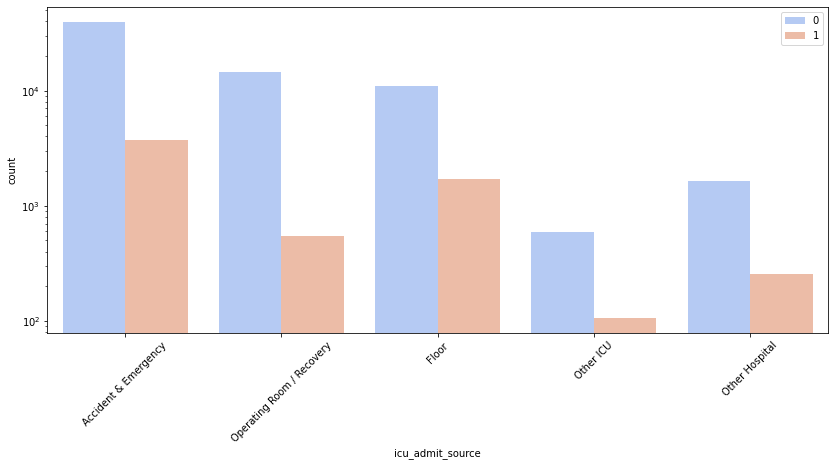

_______________________________________________________________________________
ICU_ID

30147    374
56296    601
1974     100
25438    374
79125    798
Name: icu_id, dtype: int64

Description:  unique identifier for the unit to which the patient was admitted


Number of Null values:
0

Value Counts:
653    1050
876    1040
646    1028
413     962
236     916
337     902
133     829
434     794
404     757
840     754
895     748
114     745
376     730
657     726
369     712
92      700
391     695
608     691
855     687
504     678
513     661
464     658
95      656
622     646
324     639
489     633
711     633
498     612
408     611
809     600
798     600
687     599
685     586
619     577
709     576
251     569
697     568
678     556
212     551
623     541
374     538
628     535
841     535
97      530
684     525
616     524
384     523
347     519
829     504
491     493
869     491
451     490
495     471
90      469
523     468
259     467
543     467
490     466
59

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

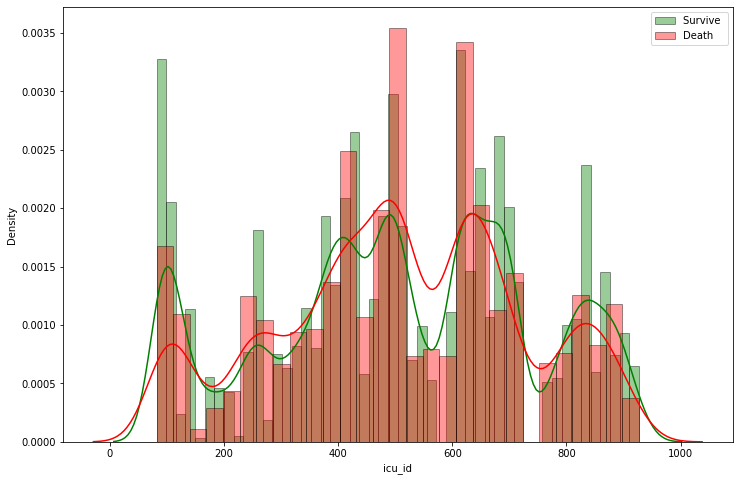

_______________________________________________________________________________
ICU_STAY_TYPE

30147    admit
56296    admit
1974     admit
25438    admit
79125    admit
Name: icu_stay_type, dtype: object

Description: string


Number of Null values:
0

Value Counts:
admit       68972
transfer     3957
readmit       441
Name: icu_stay_type, dtype: int64

count     73370
unique        3
top       admit
freq      68972
Name: icu_stay_type, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


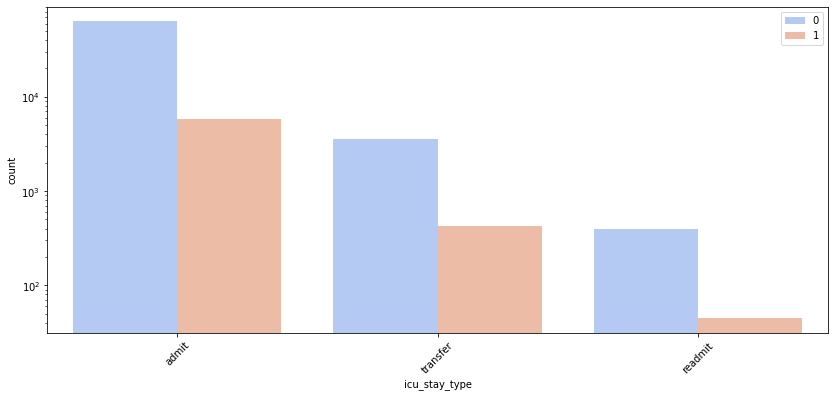

_______________________________________________________________________________
ICU_TYPE

30147    Med-Surg ICU
56296            MICU
1974        Neuro ICU
25438    Med-Surg ICU
79125    Med-Surg ICU
Name: icu_type, dtype: object

Description: A classification which indicates the type of care the unit is capable of providing


Number of Null values:
0

Value Counts:
Med-Surg ICU    40468
Neuro ICU        6153
MICU             6143
CCU-CTICU        5741
SICU             4178
Cardiac ICU      3831
CSICU            3694
CTICU            3162
Name: icu_type, dtype: int64

count            73370
unique               8
top       Med-Surg ICU
freq             40468
Name: icu_type, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


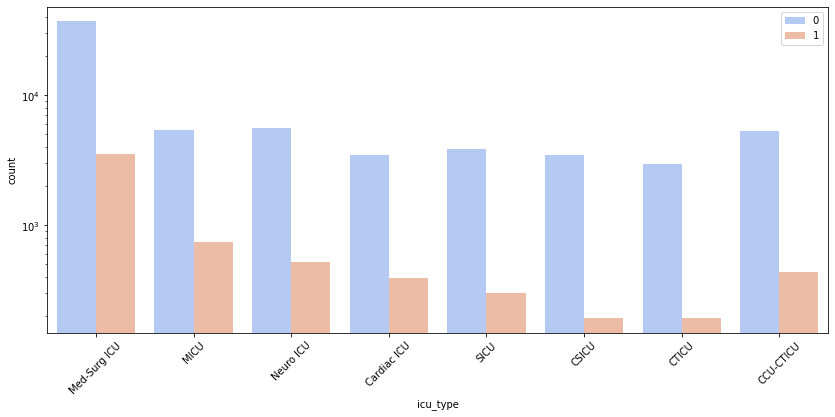

_______________________________________________________________________________
PRE_ICU_LOS_DAYS

30147    0.047222
56296    0.204167
1974     0.010417
25438    3.195833
79125    0.047917
Name: pre_icu_los_days, dtype: float64

Description: The length of stay of the patient between hospital admission and unit admission


Number of Null values:
0

Value Counts:
0.000000     2969
0.000694     1128
0.001389      813
0.002083      710
0.002778      640
             ... 
3.325000        1
6.504861        1
12.065972       1
7.000694        1
5.656250        1
Name: pre_icu_los_days, Length: 8725, dtype: int64

count    73370.000000
mean         0.839875
std          2.509672
min        -24.947222
25%          0.035417
50%          0.139583
75%          0.412500
max        159.090972
Name: pre_icu_los_days, dtype: float64


Identified lowest outliers: 3
Identified upper outliers: 1242
Identified outliers: 1245
Non-outlier observations: 72125
Total percentual of Outliers:  1.7262



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

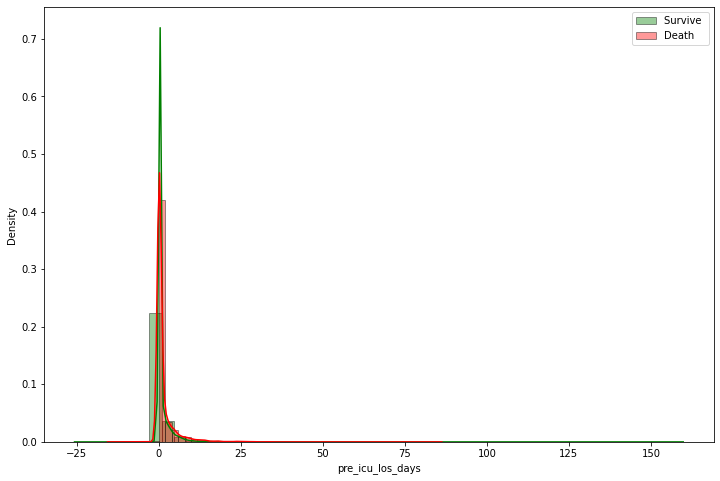

_______________________________________________________________________________
WEIGHT

30147    86.3
56296    87.0
1974     93.7
25438    81.6
79125    92.0
Name: weight, dtype: float64

Description: The weight (body mass) of the person on unit admission


Number of Null values:
2165

Value Counts:
68.00     774
81.60     697
63.50     678
90.70     623
77.10     587
         ... 
85.45       1
87.72       1
80.93       1
102.73      1
60.69       1
Name: weight, Length: 3148, dtype: int64

count    71205.000000
mean        84.022326
std         25.022951
min         38.600000
25%         66.700000
50%         80.300000
75%         97.100000
max        186.000000
Name: weight, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 1027
Identified outliers: 1027
Non-outlier observations: 70178
Total percentual of Outliers:  1.4634



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

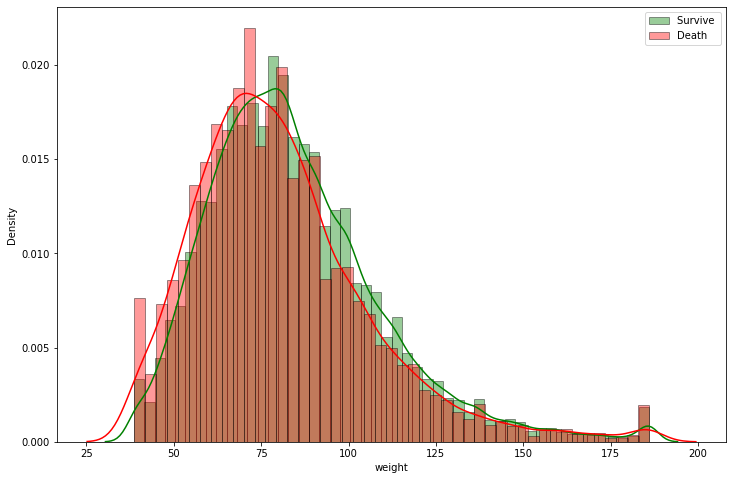

_______________________________________________________________________________
APACHE_2_DIAGNOSIS

30147    302.0
56296    120.0
1974     121.0
25438    302.0
79125    114.0
Name: apache_2_diagnosis, dtype: float64

Description: The APACHE II diagnosis for the ICU admission


Number of Null values:
1333

Value Counts:
113.0    9376
301.0    5473
302.0    5437
112.0    3425
308.0    3288
117.0    3143
124.0    3072
122.0    3042
303.0    2670
304.0    2547
110.0    2542
203.0    2069
106.0    2009
202.0    1948
114.0    1830
305.0    1829
121.0    1761
123.0    1652
102.0    1481
307.0    1459
119.0    1367
118.0    1093
120.0    1092
108.0     939
214.0     939
109.0     866
105.0     832
213.0     613
207.0     500
306.0     497
218.0     448
209.0     385
217.0     382
219.0     366
101.0     301
104.0     279
103.0     230
115.0     195
116.0     173
107.0     155
215.0     130
208.0      95
212.0      84
216.0      23
Name: apache_2_diagnosis, dtype: int64

count    72037.000000
m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

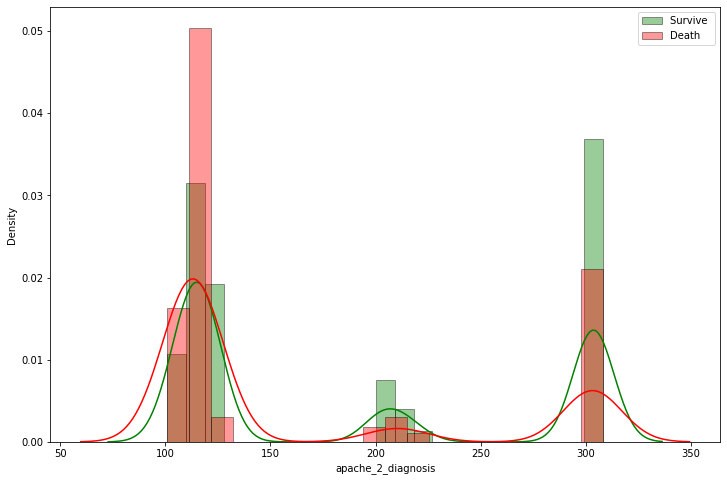

_______________________________________________________________________________
APACHE_3J_DIAGNOSIS

30147     109.16
56296     407.01
1974      409.02
25438    1208.03
79125     102.01
Name: apache_3j_diagnosis, dtype: float64

Description: The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission


Number of Null values:
869

Value Counts:
501.05     3563
107.01     3425
106.01     3143
403.01     3046
703.03     2522
104.01     2351
502.01     2272
1207.01    2223
102.01     1815
702.01     1652
212.01     1630
206.01     1481
1206.03    1448
305.02     1280
501.02     1188
111.01     1176
410.01     1153
407.01     1092
501.06      991
901.03      990
306.01      980
401.01      978
203.01      939
108.01      866
207.01      832
1205.01     795
501.01      782
305.01      739
601.01      698
704.01      654
211.09      590
501.04      551
109.09      522
409.02      521
1404.01     497
1401.01     442
1212.03     435
703.02      414
109.04      413


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

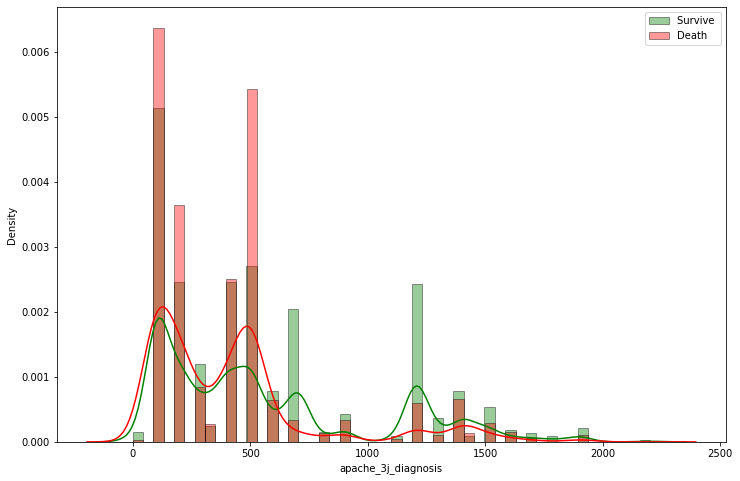

_______________________________________________________________________________
APACHE_POST_OPERATIVE

30147    0
56296    0
1974     0
25438    1
79125    0
Name: apache_post_operative, dtype: int64

Description: The APACHE operative status; 1 for post-operative, 0 for non-operative


Number of Null values:
0

Value Counts:
0    58599
1    14771
Name: apache_post_operative, dtype: int64

count    73370.000000
mean         0.201322
std          0.400991
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: apache_post_operative, dtype: float64




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 73370
Total percentual of Outliers:  0.0



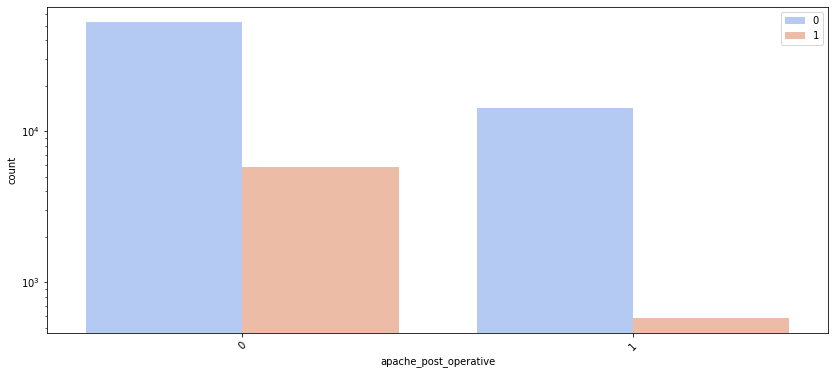

_______________________________________________________________________________
ARF_APACHE

30147    0.0
56296    1.0
1974     0.0
25438    0.0
79125    0.0
Name: arf_apache, dtype: float64

Description:  Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis


Number of Null values:
564

Value Counts:
0.0    70758
1.0     2048
Name: arf_apache, dtype: int64

count    72806.000000
mean         0.028130
std          0.165344
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: arf_apache, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 2048
Identified outliers: 2048
Non-outlier observations: 70758
Total percentual of Outliers:  2.8944



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


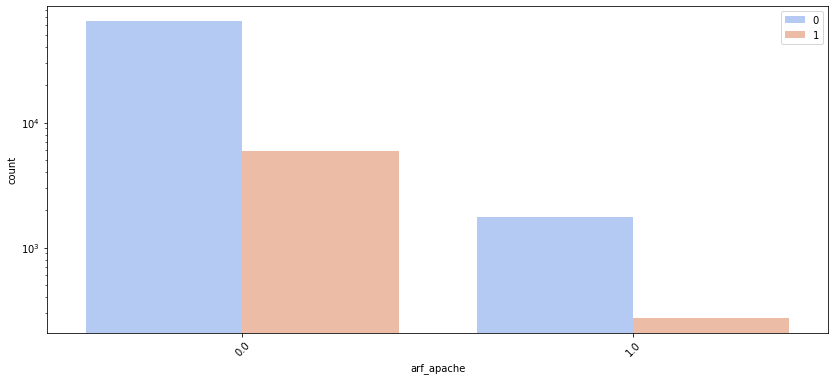

_______________________________________________________________________________
GCS_EYES_APACHE

30147    4.0
56296    4.0
1974     4.0
25438    4.0
79125    1.0
Name: gcs_eyes_apache, dtype: float64

Description: The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1499

Value Counts:
4.0    50473
3.0    11052
1.0     6598
2.0     3748
Name: gcs_eyes_apache, dtype: int64

count    71871.000000
mean         3.466516
std          0.950794
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: gcs_eyes_apache, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 71871
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


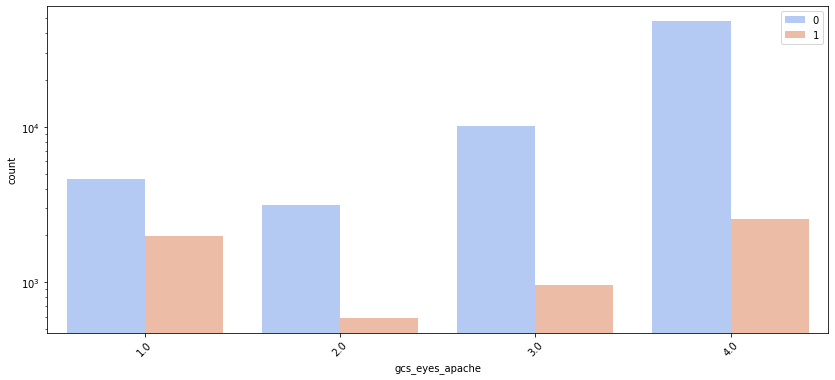

_______________________________________________________________________________
GCS_MOTOR_APACHE

30147    6.0
56296    5.0
1974     6.0
25438    6.0
79125    1.0
Name: gcs_motor_apache, dtype: float64

Description: The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1499

Value Counts:
6.0    56784
5.0     6401
1.0     4430
4.0     3596
3.0      432
2.0      228
Name: gcs_motor_apache, dtype: int64

count    71871.000000
mean         5.471957
std          1.286935
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          6.000000
Name: gcs_motor_apache, dtype: float64


Identified lowest outliers: 4430
Identified upper outliers: 0
Identified outliers: 4430
Non-outlier observations: 67441
Total percentual of Outliers:  6.5687



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


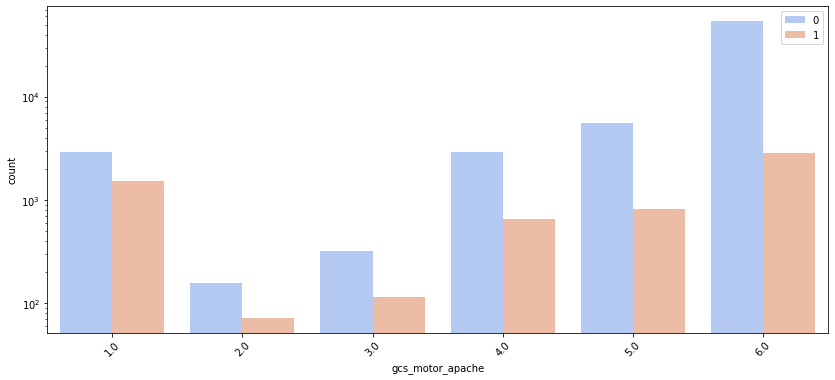

_______________________________________________________________________________
GCS_UNABLE_APACHE

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: gcs_unable_apache, dtype: float64

Description: Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation


Number of Null values:
817

Value Counts:
0.0    71871
1.0      682
Name: gcs_unable_apache, dtype: int64

count    72553.000000
mean         0.009400
std          0.096498
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: gcs_unable_apache, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 682
Identified outliers: 682
Non-outlier observations: 71871
Total percentual of Outliers:  0.9489



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


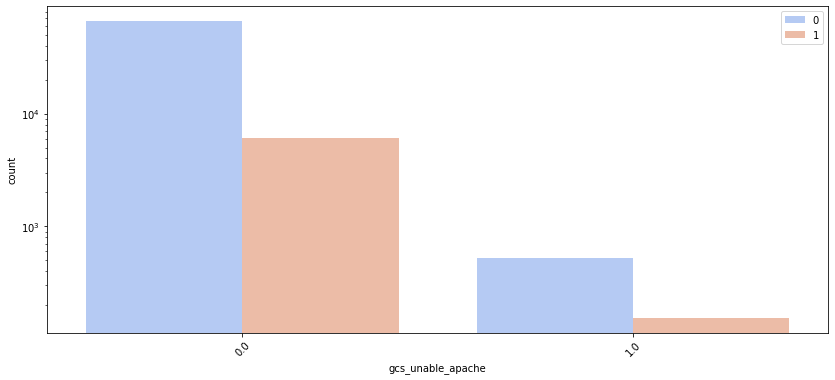

_______________________________________________________________________________
GCS_VERBAL_APACHE

30147    5.0
56296    4.0
1974     5.0
25438    5.0
79125    1.0
Name: gcs_verbal_apache, dtype: float64

Description: The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
1499

Value Counts:
5.0    45491
1.0    13399
4.0     8845
3.0     2563
2.0     1573
Name: gcs_verbal_apache, dtype: int64

count    71871.000000
mean         3.994226
std          1.560142
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: gcs_verbal_apache, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 71871
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


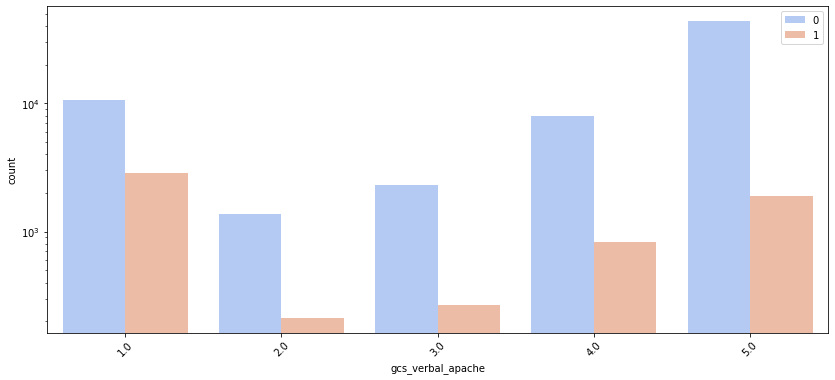

_______________________________________________________________________________
HEART_RATE_APACHE

30147     54.0
56296    109.0
1974      54.0
25438    117.0
79125    101.0
Name: heart_rate_apache, dtype: float64

Description: The heart rate measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
689

Value Counts:
100.0    1487
108.0    1422
102.0    1411
104.0    1366
106.0    1356
98.0     1354
110.0    1349
60.0     1313
96.0     1312
112.0    1276
114.0    1244
101.0    1188
103.0    1157
105.0    1154
107.0    1151
116.0    1139
97.0     1112
94.0     1106
118.0    1097
109.0    1093
92.0     1073
120.0    1052
99.0     1030
111.0    1014
113.0     987
115.0     975
56.0      961
117.0     952
95.0      949
58.0      949
93.0      917
124.0     879
54.0      878
90.0      876
122.0     872
52.0      856
121.0     808
123.0     805
126.0     804
119.0     802
91.0      780
59.0      775
50.0      774
55.0      762
128.0     757
57

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

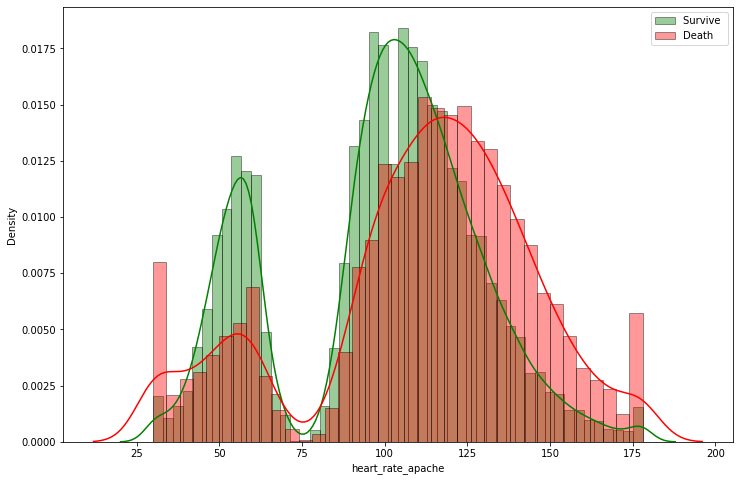

_______________________________________________________________________________
INTUBATED_APACHE

30147    0.0
56296    1.0
1974     0.0
25438    0.0
79125    0.0
Name: intubated_apache, dtype: float64

Description: Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score


Number of Null values:
564

Value Counts:
0.0    61788
1.0    11018
Name: intubated_apache, dtype: int64

count    72806.000000
mean         0.151334
std          0.358376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: intubated_apache, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 72806
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


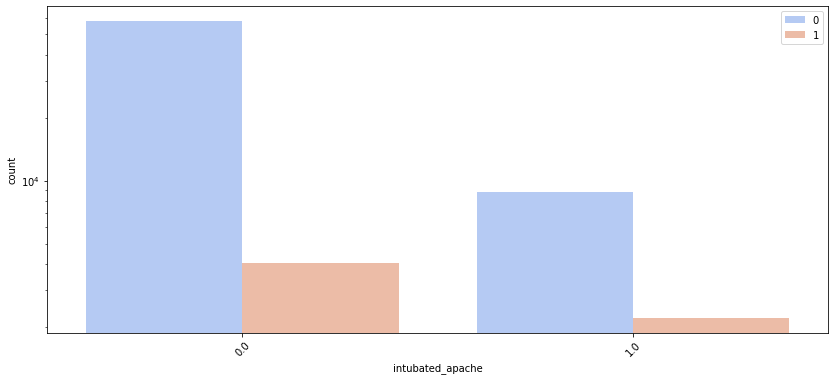

_______________________________________________________________________________
MAP_APACHE

30147    107.0
56296    156.0
1974     131.0
25438     72.0
79125     48.0
Name: map_apache, dtype: float64

Description: The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
782

Value Counts:
56.0     1707
54.0     1616
60.0     1602
58.0     1546
53.0     1532
57.0     1517
40.0     1506
55.0     1498
52.0     1483
59.0     1462
51.0     1458
50.0     1410
62.0     1401
61.0     1334
48.0     1319
64.0     1276
49.0     1267
63.0     1247
47.0     1201
65.0     1185
41.0     1156
46.0     1127
43.0     1109
42.0     1104
44.0     1093
45.0     1080
66.0     1057
67.0     1016
68.0      918
69.0      812
70.0      748
71.0      656
120.0     656
117.0     631
119.0     625
124.0     620
121.0     617
123.0     617
122.0     604
118.0     604
72.0      600
125.0     599
116.0     590
126.0     586
128.0     583
129.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

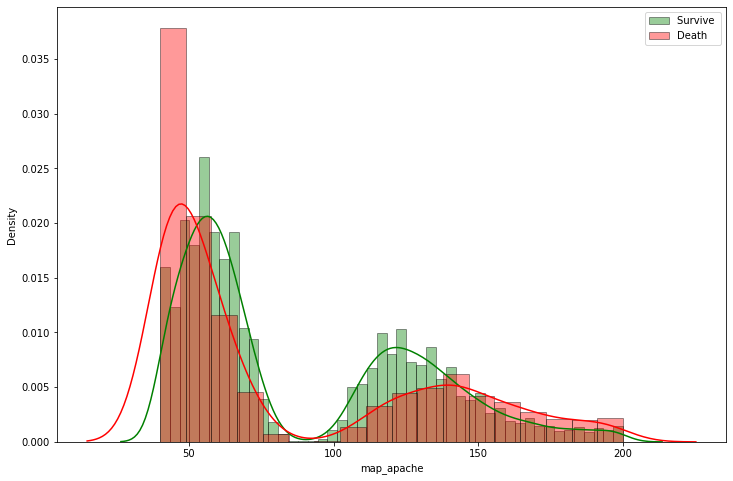

_______________________________________________________________________________
RESPRATE_APACHE

30147    10.0
56296     5.0
1974     34.0
25438    26.0
79125    29.0
Name: resprate_apache, dtype: float64

Description: The respiratory rate measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
982

Value Counts:
10.0    3436
12.0    3373
11.0    3122
4.0     2838
9.0     2714
30.0    2506
28.0    2459
29.0    2355
8.0     2302
31.0    2171
32.0    2143
33.0    2138
27.0    2114
35.0    1972
34.0    1953
7.0     1924
13.0    1881
26.0    1842
36.0    1785
6.0     1670
5.0     1653
37.0    1504
14.0    1493
38.0    1474
39.0    1315
25.0    1225
40.0    1174
41.0    1098
16.0    1018
42.0     970
43.0     885
24.0     879
44.0     790
45.0     749
60.0     749
46.0     688
47.0     638
48.0     586
59.0     547
49.0     539
50.0     525
15.0     502
52.0     456
51.0     434
55.0     428
53.0     425
58.0     419
57.0     417
54.0     41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

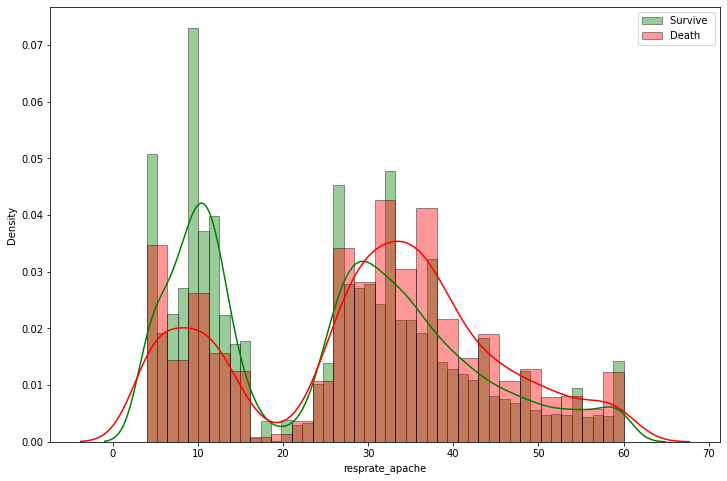

_______________________________________________________________________________
TEMP_APACHE

30147    35.7
56296    36.2
1974     36.4
25438    35.8
79125    32.9
Name: temp_apache, dtype: float64

Description: The temperature measured during the first 24 hours which results in the highest APACHE III score


Number of Null values:
3263

Value Counts:
36.40    7459
36.60    6862
36.70    6476
36.30    5382
36.50    4927
36.80    4623
36.20    3840
36.10    3683
36.90    2955
36.00    2270
35.90    1776
37.00    1689
35.80    1644
37.10    1588
35.60    1329
37.20    1189
35.70    1112
37.30     643
35.40     535
37.40     462
35.50     462
35.30     426
32.10     420
35.20     349
35.00     316
39.70     300
36.44     269
35.10     263
36.55     261
37.50     260
37.60     243
36.38     240
36.61     237
36.33     196
36.72     177
36.66     176
34.70     173
39.40     166
34.90     163
37.70     162
34.80     160
34.60     151
36.77     139
36.83     133
34.40     125
39.20     121
39.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Identified lowest outliers: 1275
Identified upper outliers: 1124
Identified outliers: 2399
Non-outlier observations: 67708
Total percentual of Outliers:  3.5432



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


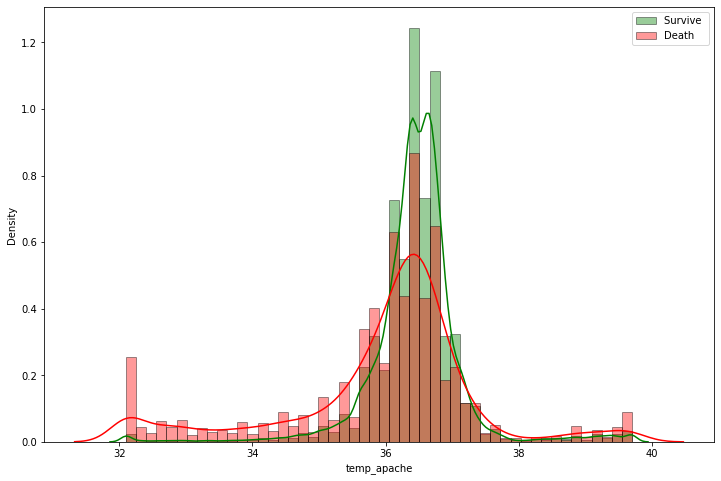

_______________________________________________________________________________
VENTILATED_APACHE

30147    0.0
56296    1.0
1974     0.0
25438    0.0
79125    1.0
Name: ventilated_apache, dtype: float64

Description: Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy


Number of Null values:
564

Value Counts:
0.0    49134
1.0    23672
Name: ventilated_apache, dtype: int64

count    72806.000000
mean         0.325138
std          0.468430
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ventilated_apache, dtype: float64




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 72806
Total percentual of Outliers:  0.0



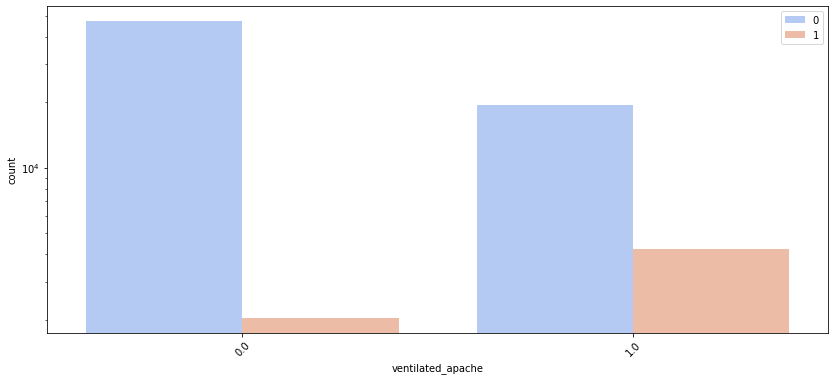

_______________________________________________________________________________
D1_DIASBP_MAX

30147     87.0
56296    141.0
1974      91.0
25438     88.0
79125     80.0
Name: d1_diasbp_max, dtype: float64

Description: The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
125

Value Counts:
84.0     1674
80.0     1672
88.0     1641
86.0     1639
82.0     1629
83.0     1619
87.0     1615
78.0     1591
90.0     1590
85.0     1581
79.0     1574
81.0     1570
91.0     1555
77.0     1501
89.0     1496
92.0     1493
74.0     1485
93.0     1485
94.0     1477
76.0     1463
75.0     1432
97.0     1419
96.0     1384
95.0     1361
98.0     1334
73.0     1309
72.0     1296
99.0     1247
70.0     1213
71.0     1165
68.0     1014
100.0    1010
69.0      999
67.0      992
101.0     979
102.0     928
66.0      900
103.0     849
65.0      839
104.0     778
64.0      777
105.0     761
106.0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

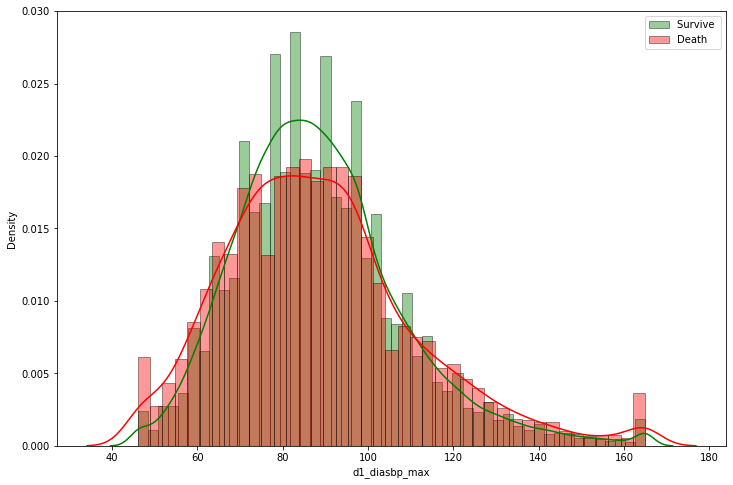

_______________________________________________________________________________
D1_DIASBP_MIN

30147    54.0
56296    52.0
1974     54.0
25438    56.0
79125    64.0
Name: d1_diasbp_min, dtype: float64

Description: The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
125

Value Counts:
50.0    2755
51.0    2479
52.0    2325
53.0    2271
55.0    2270
47.0    2255
46.0    2237
49.0    2227
48.0    2219
54.0    2168
45.0    2142
56.0    2121
44.0    2066
43.0    1967
57.0    1943
42.0    1937
40.0    1804
58.0    1791
41.0    1789
59.0    1713
60.0    1542
39.0    1528
38.0    1483
61.0    1329
37.0    1327
62.0    1312
63.0    1194
36.0    1167
35.0    1105
64.0    1079
65.0    1058
34.0     986
66.0     875
67.0     874
33.0     841
68.0     769
32.0     763
69.0     674
70.0     636
30.0     635
31.0     627
72.0     542
71.0     533
29.0     503
73.0     468
28.0     430
13.0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

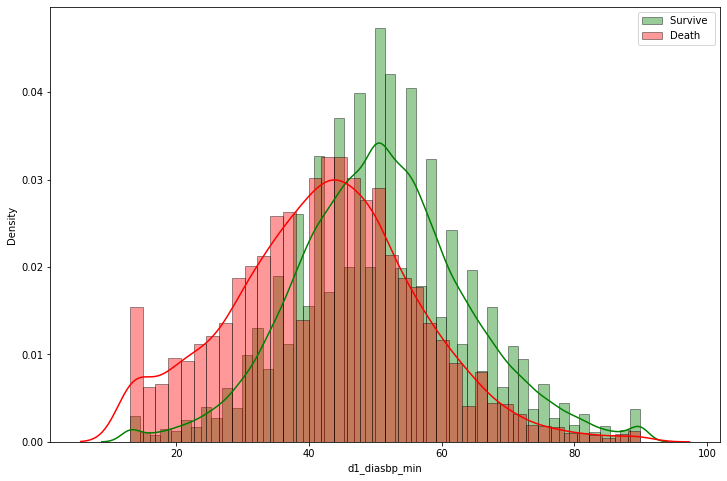

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MAX

30147     87.0
56296    141.0
1974      91.0
25438     88.0
79125     80.0
Name: d1_diasbp_noninvasive_max, dtype: float64

Description: The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
811

Value Counts:
84.0     1660
80.0     1644
88.0     1627
86.0     1616
87.0     1611
83.0     1611
82.0     1610
90.0     1577
85.0     1575
79.0     1567
78.0     1566
81.0     1554
91.0     1545
89.0     1491
77.0     1487
92.0     1485
93.0     1475
94.0     1473
74.0     1456
76.0     1437
97.0     1412
75.0     1410
96.0     1379
95.0     1357
98.0     1331
73.0     1302
72.0     1259
99.0     1247
70.0     1205
71.0     1153
100.0    1006
68.0     1001
69.0      988
101.0     977
67.0      974
102.0     928
66.0      875
103.0     849
65.0      825
104.0     775
105.0     759
106.0     747
64.0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

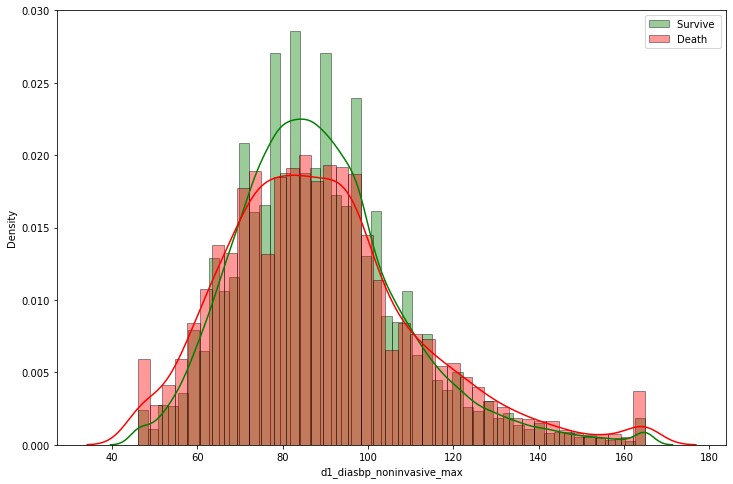

_______________________________________________________________________________
D1_DIASBP_NONINVASIVE_MIN

30147    54.0
56296    52.0
1974     54.0
25438    56.0
79125    64.0
Name: d1_diasbp_noninvasive_min, dtype: float64

Description: The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
811

Value Counts:
50.0    2728
51.0    2453
52.0    2305
53.0    2263
55.0    2260
47.0    2231
49.0    2216
48.0    2189
46.0    2175
54.0    2151
45.0    2123
56.0    2112
44.0    2016
43.0    1943
57.0    1939
42.0    1879
58.0    1790
41.0    1762
40.0    1748
59.0    1717
60.0    1537
39.0    1518
38.0    1450
61.0    1330
37.0    1312
62.0    1303
63.0    1195
36.0    1134
35.0    1085
64.0    1078
65.0    1057
34.0     966
67.0     876
66.0     875
33.0     830
68.0     769
32.0     745
69.0     674
70.0     637
30.0     629
31.0     617
72.0     541
71.0     536
29.0     497
73.0     475
28.0     427
13.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

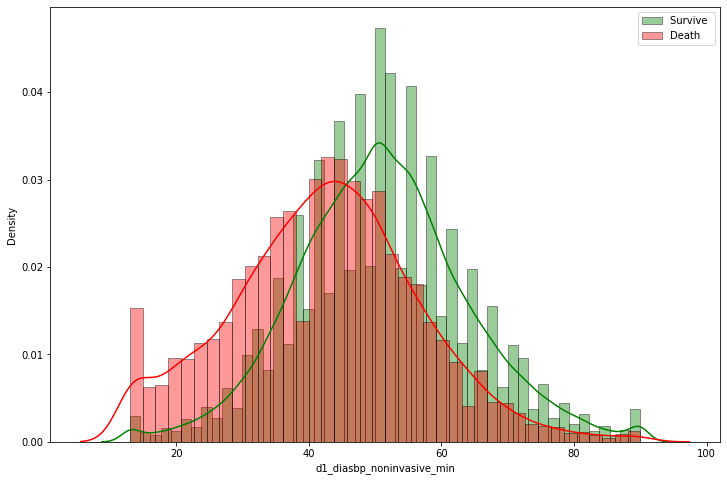

_______________________________________________________________________________
D1_HEARTRATE_MAX

30147     79.0
56296     95.0
1974      80.0
25438    114.0
79125     94.0
Name: d1_heartrate_max, dtype: float64

Description: The patient's highest heart rate during the first 24 hours of their unit stay


Number of Null values:
111

Value Counts:
96.0     1630
100.0    1600
98.0     1559
90.0     1539
92.0     1523
94.0     1470
88.0     1437
102.0    1413
104.0    1396
106.0    1381
108.0    1362
97.0     1296
110.0    1273
86.0     1254
80.0     1230
93.0     1225
84.0     1210
101.0    1195
95.0     1181
91.0     1166
112.0    1166
82.0     1166
99.0     1159
107.0    1134
103.0    1130
114.0    1129
89.0     1124
105.0    1120
87.0     1113
109.0    1097
85.0     1026
118.0    1001
116.0     989
120.0     979
113.0     949
81.0      930
83.0      916
111.0     911
78.0      908
115.0     889
117.0     874
122.0     836
76.0      782
79.0      765
124.0     764
77.0      734
121.0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

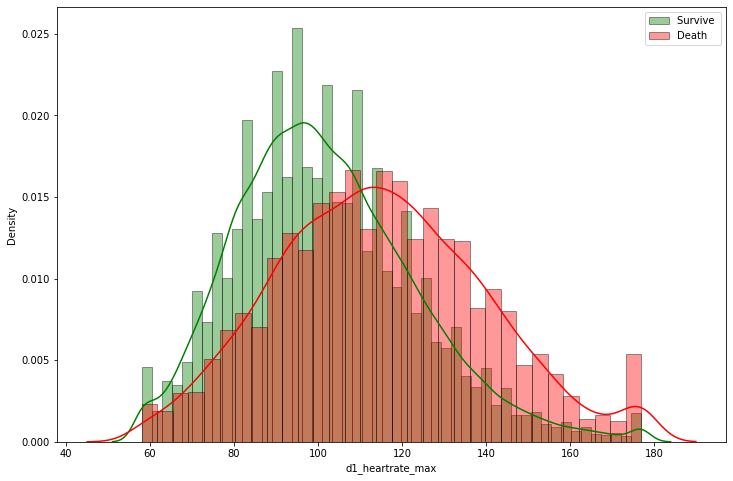

_______________________________________________________________________________
D1_HEARTRATE_MIN

30147    56.0
56296    64.0
1974     58.0
25438    90.0
79125    69.0
Name: d1_heartrate_min, dtype: float64

Description: The patient's lowest heart rate during the first 24 hours of their unit stay


Number of Null values:
111

Value Counts:
60.0     2710
70.0     2383
68.0     2094
62.0     2021
66.0     1989
64.0     1981
72.0     1917
74.0     1824
58.0     1772
65.0     1743
80.0     1667
69.0     1666
76.0     1622
67.0     1602
61.0     1590
78.0     1577
73.0     1562
63.0     1543
59.0     1541
71.0     1516
56.0     1501
75.0     1488
82.0     1354
79.0     1331
77.0     1330
57.0     1289
54.0     1284
84.0     1242
81.0     1109
55.0     1082
86.0     1075
52.0     1043
83.0      993
88.0      984
53.0      910
50.0      904
85.0      889
90.0      885
87.0      811
51.0      765
89.0      747
92.0      742
94.0      634
48.0      624
91.0      608
96.0      591
49.0      590


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

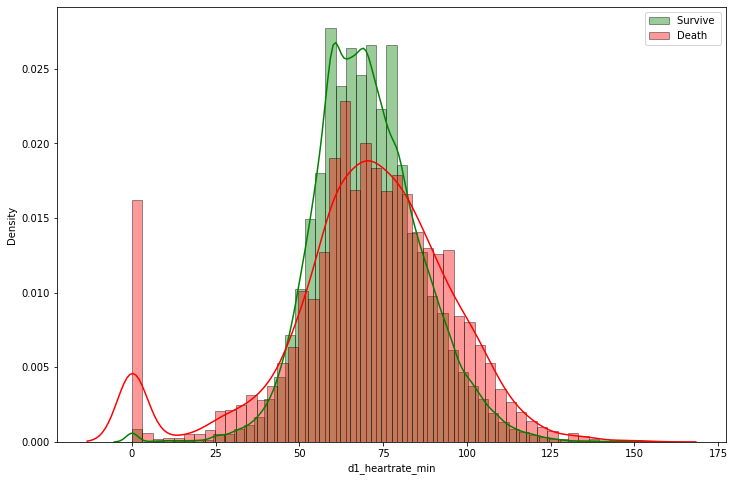

_______________________________________________________________________________
D1_MBP_MAX

30147    107.0
56296    156.0
1974     131.0
25438    100.0
79125     94.0
Name: d1_mbp_max, dtype: float64

Description: The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
170

Value Counts:
96.0     1689
100.0    1641
98.0     1635
97.0     1617
104.0    1584
102.0    1557
103.0    1554
95.0     1527
101.0    1519
94.0     1518
106.0    1486
99.0     1469
105.0    1457
107.0    1441
92.0     1430
93.0     1426
108.0    1422
90.0     1407
91.0     1405
110.0    1324
89.0     1309
109.0    1294
88.0     1282
112.0    1276
86.0     1262
87.0     1221
111.0    1218
113.0    1124
85.0     1107
114.0    1075
84.0     1060
116.0    1051
115.0    1040
83.0      978
82.0      961
117.0     959
119.0     929
81.0      897
118.0     880
80.0      825
121.0     820
120.0     810
79.0      749
122.0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

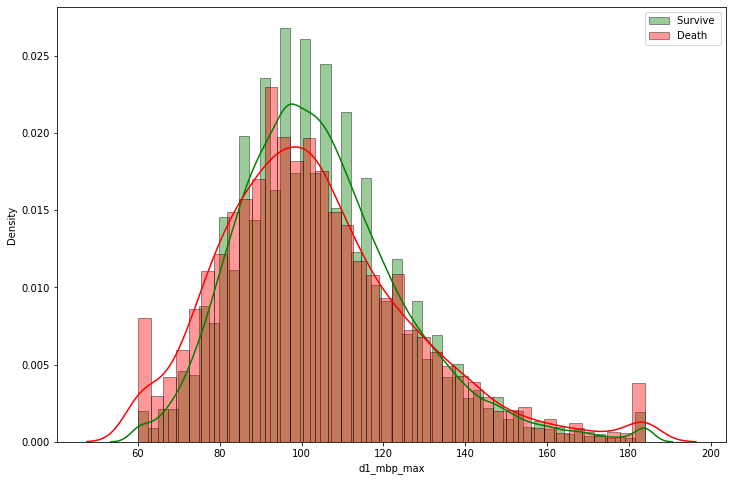

_______________________________________________________________________________
D1_MBP_MIN

30147    78.0
56296    64.0
1974     75.0
25438    65.0
79125    80.0
Name: d1_mbp_min, dtype: float64

Description: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
170

Value Counts:
60.0     2110
64.0     2073
62.0     2034
59.0     2032
61.0     2027
63.0     2021
65.0     2013
67.0     1973
58.0     1926
56.0     1912
57.0     1896
66.0     1891
68.0     1800
55.0     1790
69.0     1717
70.0     1711
54.0     1709
71.0     1593
53.0     1582
73.0     1534
72.0     1504
52.0     1481
51.0     1412
74.0     1399
75.0     1397
76.0     1307
50.0     1224
77.0     1180
78.0     1169
49.0     1101
48.0     1066
79.0     1064
80.0     1051
81.0      950
47.0      913
82.0      880
46.0      837
83.0      807
84.0      777
85.0      713
45.0      710
44.0      661
86.0      632
87.0      606

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

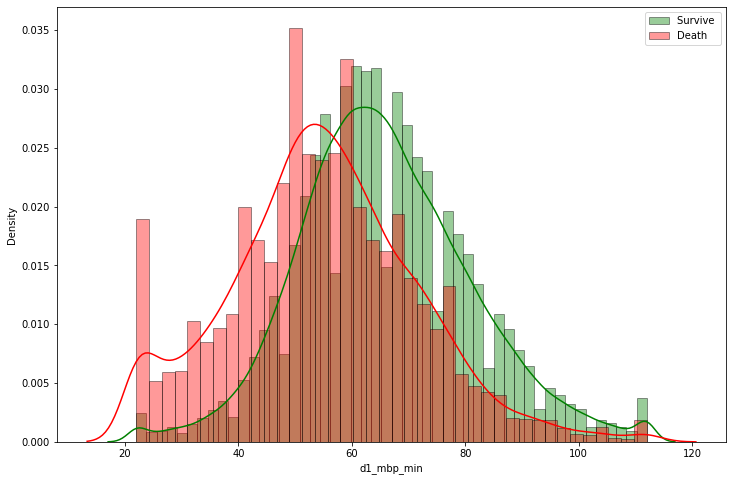

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MAX

30147    107.0
56296    156.0
1974     131.0
25438    100.0
79125     94.0
Name: d1_mbp_noninvasive_max, dtype: float64

Description: The patient's highest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1154

Value Counts:
96.0     1665
100.0    1602
98.0     1600
97.0     1597
104.0    1560
103.0    1542
102.0    1520
95.0     1501
101.0    1499
94.0     1475
106.0    1463
99.0     1454
105.0    1443
107.0    1422
93.0     1410
92.0     1391
91.0     1390
108.0    1388
90.0     1375
110.0    1305
89.0     1295
109.0    1286
88.0     1257
112.0    1249
86.0     1231
111.0    1210
87.0     1205
113.0    1112
85.0     1098
114.0    1050
84.0     1036
116.0    1032
115.0    1028
83.0      970
117.0     949
82.0      943
119.0     923
81.0      878
118.0     871
80.0      821
121.0     813
120.0     791
79.0      750
122

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

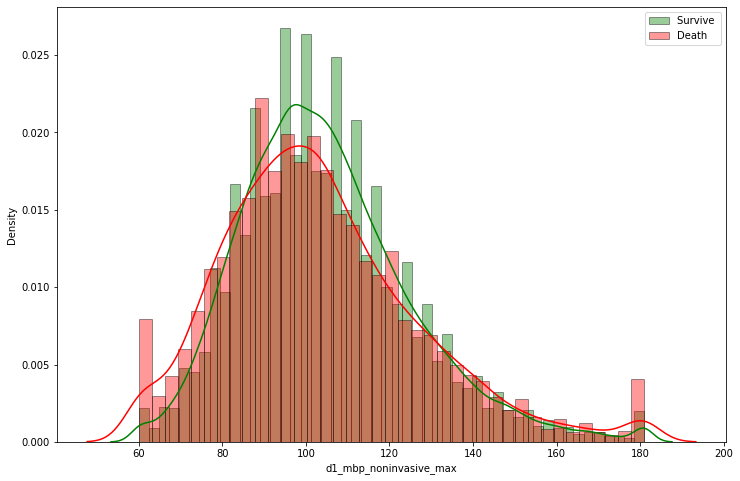

_______________________________________________________________________________
D1_MBP_NONINVASIVE_MIN

30147    78.0
56296    64.0
1974     75.0
25438    65.0
79125    80.0
Name: d1_mbp_noninvasive_min, dtype: float64

Description: The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured


Number of Null values:
1154

Value Counts:
60.0     2051
64.0     2023
63.0     1999
65.0     1994
59.0     1992
61.0     1991
62.0     1977
67.0     1959
57.0     1874
58.0     1867
66.0     1855
56.0     1848
68.0     1771
55.0     1765
69.0     1708
70.0     1698
54.0     1659
71.0     1585
53.0     1568
73.0     1527
72.0     1492
52.0     1430
74.0     1396
75.0     1395
51.0     1392
76.0     1292
50.0     1194
77.0     1183
78.0     1166
49.0     1092
79.0     1056
48.0     1039
80.0     1036
81.0      940
47.0      900
82.0      874
46.0      812
83.0      810
84.0      771
85.0      711
45.0      702
44.0      649
86.0      626
87.0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

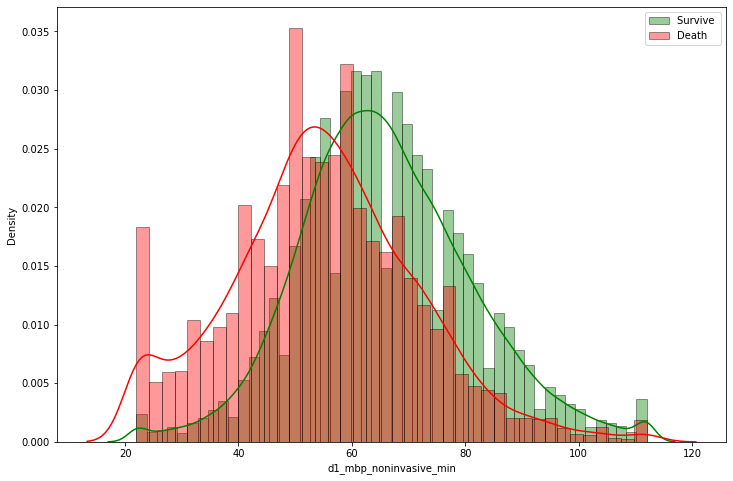

_______________________________________________________________________________
D1_RESPRATE_MAX

30147    23.0
56296    22.0
1974     32.0
25438    26.0
79125    26.0
Name: d1_resprate_max, dtype: float64

Description: The patient's highest respiratory rate during the first 24 hours of their unit stay


Number of Null values:
304

Value Counts:
24.0    5011
22.0    4488
20.0    4406
25.0    4281
26.0    4225
23.0    4202
28.0    3930
27.0    3670
21.0    3291
30.0    3233
29.0    3121
31.0    2336
32.0    2286
18.0    2186
19.0    1943
33.0    1943
34.0    1721
35.0    1518
36.0    1439
38.0    1123
37.0    1087
17.0     923
39.0     891
40.0     880
16.0     835
41.0     675
14.0     633
42.0     615
43.0     488
44.0     486
45.0     418
92.0     394
15.0     374
46.0     360
47.0     313
48.0     299
49.0     247
50.0     242
52.0     192
51.0     186
53.0     171
54.0     156
55.0     154
56.0     131
57.0     122
59.0     117
60.0     106
58.0      93
61.0      88
62.0      74
63.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

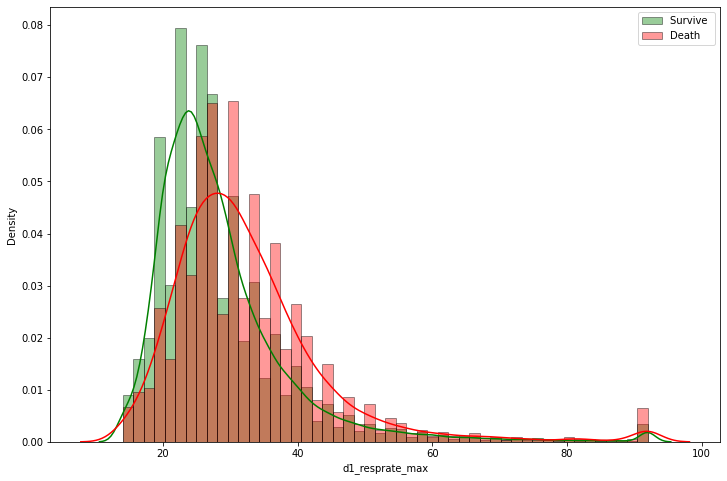

_______________________________________________________________________________
D1_RESPRATE_MIN

30147    10.0
56296    10.0
1974      9.0
25438    13.0
79125    12.0
Name: d1_resprate_min, dtype: float64

Description: The patient's lowest respiratory rate during the first 24 hours of their unit stay


Number of Null values:
304

Value Counts:
12.0     8759
14.0     7258
16.0     6144
13.0     6112
11.0     5910
10.0     5889
15.0     5292
9.0      3612
18.0     3350
17.0     3015
0.0      2929
8.0      2901
20.0     1857
7.0      1680
19.0     1658
6.0      1133
21.0      799
22.0      787
5.0       670
23.0      518
4.0       499
24.0      476
3.0       275
25.0      272
2.0       230
26.0      225
1.0       180
28.0      142
27.0      127
29.0       84
30.0       77
32.0       42
33.0       36
31.0       28
35.0       23
36.0       17
34.0       12
37.0       10
40.0        7
39.0        7
41.0        4
42.0        3
44.0        3
38.0        3
46.0        2
45.0        2
48.0      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

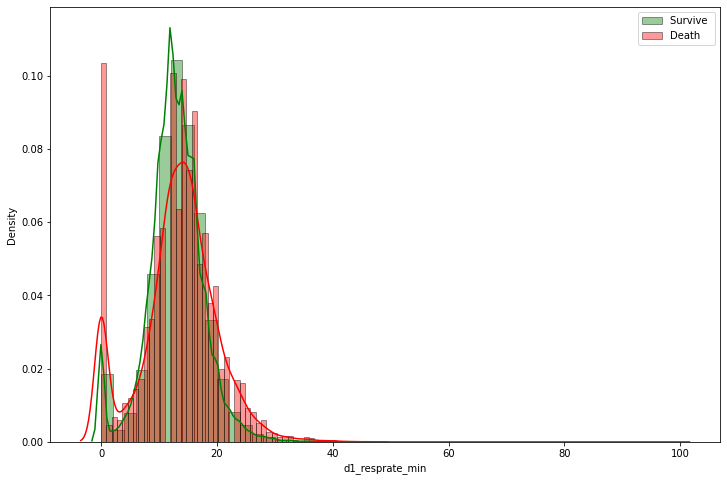

_______________________________________________________________________________
D1_SPO2_MAX

30147     98.0
56296    100.0
1974      99.0
25438    100.0
79125    100.0
Name: d1_spo2_max, dtype: float64

Description: The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay


Number of Null values:
259

Value Counts:
100.0    48308
99.0     10465
98.0      6890
97.0      3686
96.0      2015
95.0       874
94.0       382
93.0       207
92.0        99
91.0        41
90.0        29
89.0        21
88.0        14
87.0         9
82.0         7
84.0         6
77.0         5
83.0         5
80.0         5
85.0         4
76.0         4
0.0          4
86.0         4
64.0         3
67.0         3
73.0         2
81.0         2
75.0         2
78.0         2
74.0         2
60.0         1
65.0         1
16.0         1
71.0         1
31.0         1
13.0         1
79.0         1
40.0         1
70.0         1
62.0         1
56.0         1
Name: d1_spo2_max, dtype: int

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

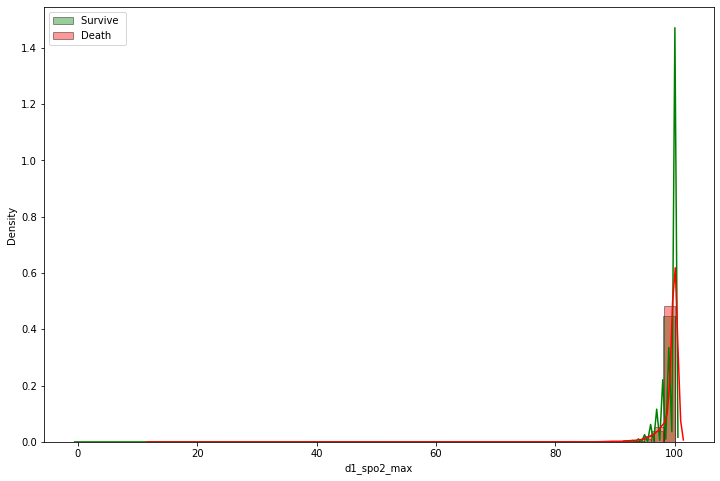

_______________________________________________________________________________
D1_SPO2_MIN

30147    89.0
56296    93.0
1974     95.0
25438    84.0
79125    88.0
Name: d1_spo2_min, dtype: float64

Description: The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay


Number of Null values:
259

Value Counts:
94.0     6983
92.0     6961
93.0     6929
95.0     6445
91.0     5809
96.0     5387
90.0     5278
97.0     4233
89.0     3239
98.0     2964
88.0     2600
99.0     1861
87.0     1763
100.0    1638
86.0     1508
85.0     1193
84.0      966
83.0      795
82.0      682
81.0      576
80.0      550
79.0      441
78.0      381
77.0      349
76.0      276
75.0      233
74.0      208
73.0      189
71.0      174
72.0      163
70.0      150
69.0      127
68.0      125
0.0       118
67.0      101
66.0      100
65.0       93
64.0       74
63.0       71
60.0       64
61.0       64
50.0       58
62.0       58
56.0       50
59.0       46
53.0       46
51.0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

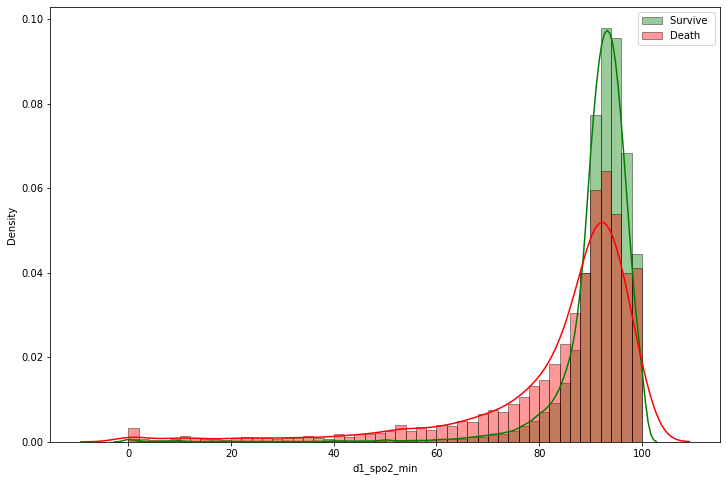

_______________________________________________________________________________
D1_SYSBP_MAX

30147    160.0
56296    216.0
1974     183.0
25438    158.0
79125    136.0
Name: d1_sysbp_max, dtype: float64

Description: The patient's highest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
120

Value Counts:
140.0    1295
146.0    1220
135.0    1197
134.0    1196
139.0    1188
144.0    1185
137.0    1176
142.0    1172
147.0    1162
145.0    1158
133.0    1154
138.0    1151
143.0    1149
150.0    1122
149.0    1112
131.0    1110
148.0    1108
136.0    1106
132.0    1105
141.0    1101
152.0    1094
154.0    1089
130.0    1060
153.0    1060
151.0    1054
129.0    1032
156.0    1029
155.0    1015
128.0     997
160.0     970
157.0     964
158.0     962
127.0     959
126.0     929
125.0     905
159.0     880
124.0     880
161.0     869
164.0     831
123.0     819
163.0     818
162.0     814
165.0     791

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

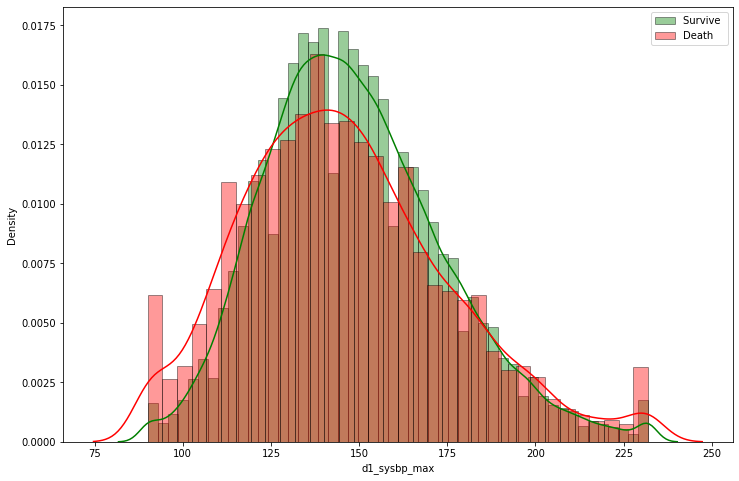

_______________________________________________________________________________
D1_SYSBP_MIN

30147    109.0
56296    105.0
1974     106.0
25438    103.0
79125    110.0
Name: d1_sysbp_min, dtype: float64

Description: The patient's lowest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured


Number of Null values:
120

Value Counts:
90.0     1745
91.0     1734
92.0     1660
94.0     1604
93.0     1591
95.0     1545
96.0     1529
97.0     1525
98.0     1456
99.0     1439
100.0    1432
87.0     1385
86.0     1380
89.0     1369
88.0     1347
103.0    1344
102.0    1342
84.0     1341
101.0    1340
85.0     1316
82.0     1293
83.0     1284
104.0    1282
105.0    1217
81.0     1200
107.0    1193
106.0    1174
80.0     1139
110.0    1084
109.0    1082
108.0    1080
112.0     997
78.0      967
111.0     957
79.0      952
114.0     878
113.0     877
115.0     866
77.0      838
116.0     837
75.0      799
117.0     796
119.0     795


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

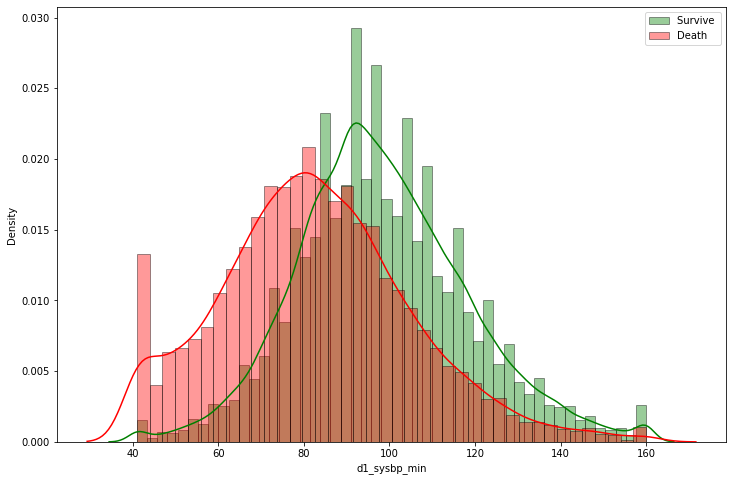

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MAX

30147    160.0
56296    216.0
1974     183.0
25438    158.0
79125    136.0
Name: d1_sysbp_noninvasive_max, dtype: float64

Description: The patient': highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured


Number of Null values:
800

Value Counts:
140.0    1273
146.0    1207
135.0    1191
139.0    1181
134.0    1177
144.0    1172
137.0    1172
145.0    1155
142.0    1154
147.0    1150
133.0    1148
143.0    1142
138.0    1126
131.0    1108
149.0    1103
150.0    1103
136.0    1097
141.0    1091
132.0    1088
148.0    1084
152.0    1075
154.0    1065
153.0    1051
130.0    1043
151.0    1043
129.0    1027
156.0    1011
155.0    1008
128.0     979
157.0     960
127.0     955
158.0     949
160.0     948
126.0     924
125.0     905
159.0     870
124.0     865
161.0     859
123.0     816
164.0     812
163.0     805
162.0     801
165.0     783


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

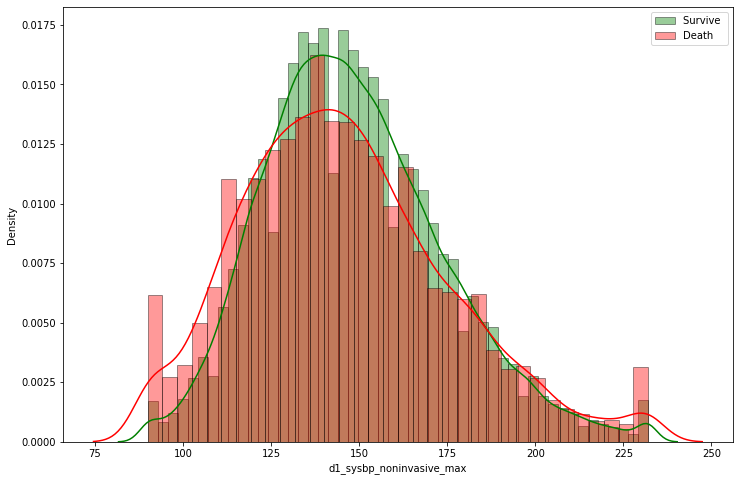

_______________________________________________________________________________
D1_SYSBP_NONINVASIVE_MIN

30147    109.0
56296    105.0
1974     106.0
25438    103.0
79125    110.0
Name: d1_sysbp_noninvasive_min, dtype: float64

Description: The patient': lowest systolic blood pressure during the first 24 hours of their unit stay, invasively measured


Number of Null values:
800

Value Counts:
90.00     1722
91.00     1719
92.00     1633
94.00     1586
93.00     1575
95.00     1542
97.00     1513
96.00     1505
98.00     1437
99.00     1431
100.00    1418
87.00     1370
86.00     1351
89.00     1350
103.00    1341
101.00    1333
102.00    1331
88.00     1321
84.00     1308
85.00     1299
104.00    1269
83.00     1269
82.00     1268
105.00    1208
81.00     1190
107.00    1181
106.00    1170
80.00     1111
109.00    1081
108.00    1075
110.00    1074
112.00     986
78.00      954
111.00     949
79.00      949
114.00     872
113.00     871
115.00     862
116.00     828
77.00      825
117

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

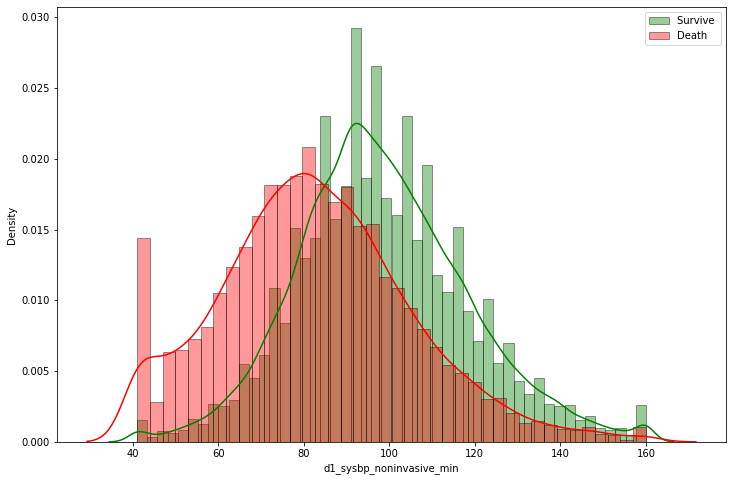

_______________________________________________________________________________
D1_TEMP_MAX

30147    36.8
56296    37.9
1974     36.7
25438    37.2
79125    36.6
Name: d1_temp_max, dtype: float64

Description: The patient:s highest core temperature during the first 24 hours of their unit stay, invasively measured


Number of Null values:
1859

Value Counts:
37.100000    6535
36.900000    6021
36.800000    5613
37.200000    5575
37.000000    4964
36.700000    4078
37.300000    4058
37.400000    3391
37.600000    2682
36.600000    2584
37.700000    2449
37.800000    2153
37.500000    2116
37.900000    1620
38.000000    1229
38.100000    1194
36.400000    1161
38.200000    1158
38.300000     985
36.500000     944
38.400000     803
36.300000     703
38.600000     630
38.700000     471
38.800000     466
38.500000     464
36.200000     452
35.100000     436
38.900000     391
36.100000     367
39.100000     284
39.400000     281
39.900000     276
39.200000     252
39.000000     243
39.300000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

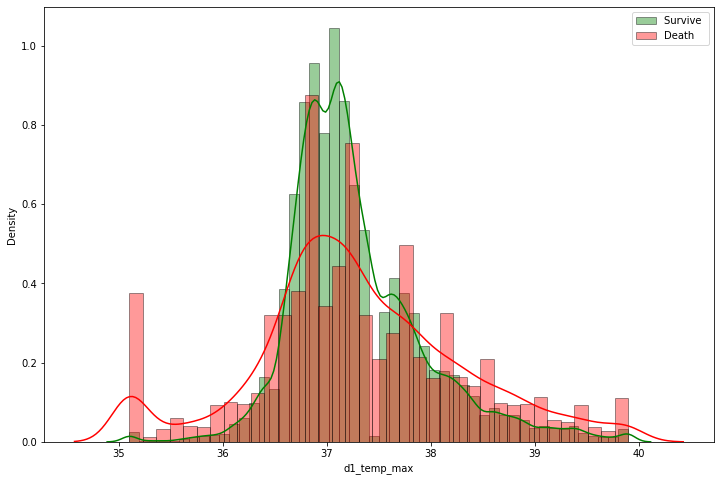

_______________________________________________________________________________
D1_TEMP_MIN

30147    35.3
56296    36.2
1974     36.4
25438    35.8
79125    32.9
Name: d1_temp_min, dtype: float64

Description: The patient's lowest core temperature during the first 24 hours of their unit stay


Number of Null values:
1859

Value Counts:
36.400000    8392
36.600000    6908
36.300000    6391
36.700000    5846
36.500000    5145
36.200000    4647
36.100000    4398
36.800000    3869
36.000000    2756
36.900000    2251
35.900000    2219
35.800000    1990
35.600000    1630
35.700000    1360
37.000000    1275
37.100000    1126
37.200000     879
35.400000     650
35.500000     546
35.300000     515
37.300000     495
35.200000     442
31.889000     436
35.000000     384
37.400000     333
35.100000     303
37.800000     291
36.380000     271
36.440000     263
36.550000     241
36.610000     212
36.330000     212
34.800000     206
34.700000     206
34.900000     202
34.600000     194
37.500000    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

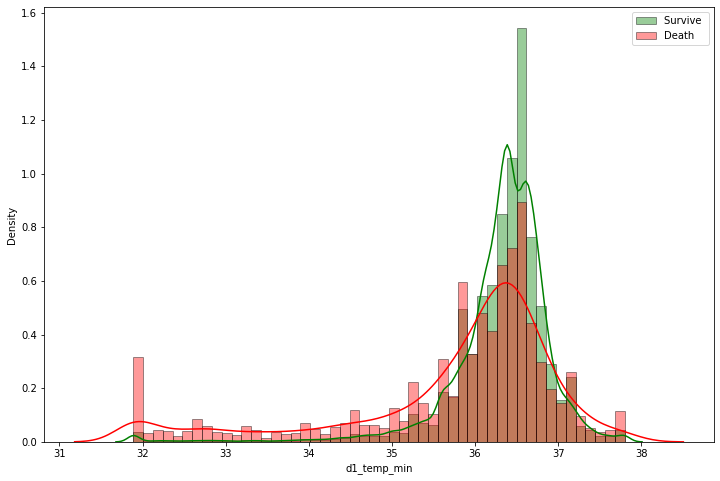

_______________________________________________________________________________
H1_DIASBP_MAX

30147     83.0
56296    139.0
1974      86.0
25438     68.0
79125     64.0
Name: h1_diasbp_max, dtype: float64

Description: The patient's highest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
2924

Value Counts:
74.0     1698
68.0     1689
70.0     1672
66.0     1618
72.0     1615
65.0     1577
67.0     1559
62.0     1547
71.0     1526
64.0     1521
75.0     1494
76.0     1485
77.0     1478
73.0     1471
60.0     1460
69.0     1453
78.0     1451
80.0     1435
63.0     1404
79.0     1399
61.0     1356
82.0     1334
59.0     1313
58.0     1295
81.0     1291
84.0     1277
83.0     1274
85.0     1154
57.0     1149
56.0     1136
86.0     1116
55.0     1090
87.0     1048
88.0     1030
54.0      960
91.0      944
90.0      918
89.0      918
92.0      917
93.0      842
52.0      815
94.0      802
53.0      794

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

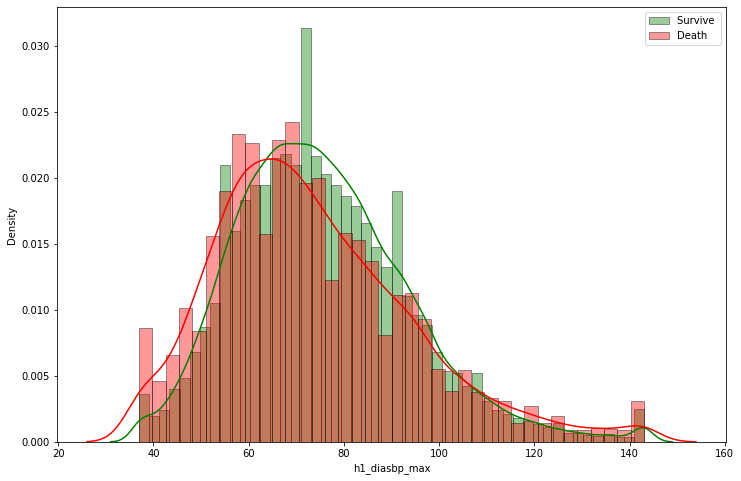

_______________________________________________________________________________
H1_DIASBP_MIN

30147     66.0
56296    112.0
1974      86.0
25438     64.0
79125     64.0
Name: h1_diasbp_min, dtype: float64

Description: The patient's lowest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
2924

Value Counts:
60.0     1927
58.0     1919
55.0     1877
56.0     1835
59.0     1793
62.0     1766
57.0     1721
65.0     1697
63.0     1681
61.0     1649
54.0     1641
64.0     1612
67.0     1588
66.0     1583
50.0     1564
52.0     1539
53.0     1535
70.0     1524
68.0     1517
51.0     1479
69.0     1375
72.0     1349
74.0     1329
71.0     1299
49.0     1279
73.0     1255
48.0     1213
47.0     1138
75.0     1124
76.0     1121
46.0     1114
77.0     1016
45.0      998
44.0      993
78.0      990
79.0      949
80.0      916
42.0      799
43.0      795
81.0      779
82.0      776
40.0      750
83.0      741


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

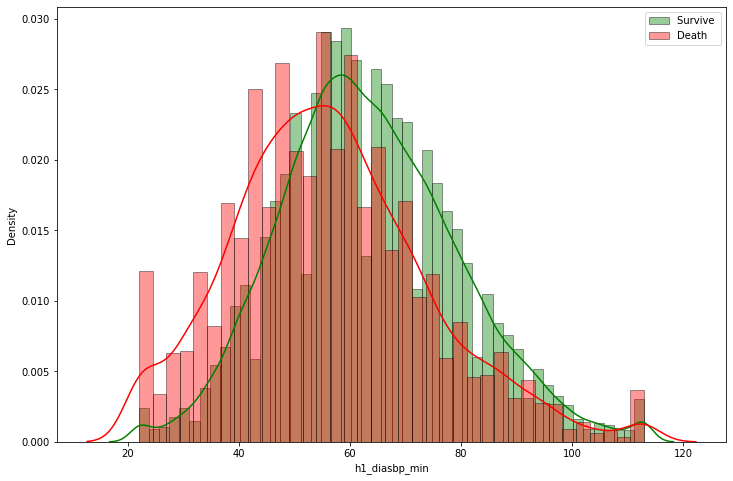

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MAX

30147     83.0
56296    139.0
1974      86.0
25438     68.0
79125     64.0
Name: h1_diasbp_noninvasive_max, dtype: float64

Description: The patient:s highest diastolic blood pressure during the first hour of their unit stay, invasively measured


Number of Null values:
5892

Value Counts:
74.0     1609
68.0     1590
70.0     1588
72.0     1529
65.0     1500
67.0     1500
66.0     1493
71.0     1471
75.0     1443
77.0     1439
73.0     1424
62.0     1418
76.0     1414
64.0     1413
69.0     1395
78.0     1392
80.0     1386
79.0     1370
60.0     1337
63.0     1336
82.0     1304
61.0     1301
81.0     1261
83.0     1259
59.0     1242
84.0     1240
58.0     1178
85.0     1131
86.0     1085
57.0     1082
56.0     1042
87.0     1039
55.0     1028
88.0     1007
91.0      938
89.0      913
92.0      898
90.0      893
54.0      875
93.0      835
94.0      795
53.0      747
52.0      742


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

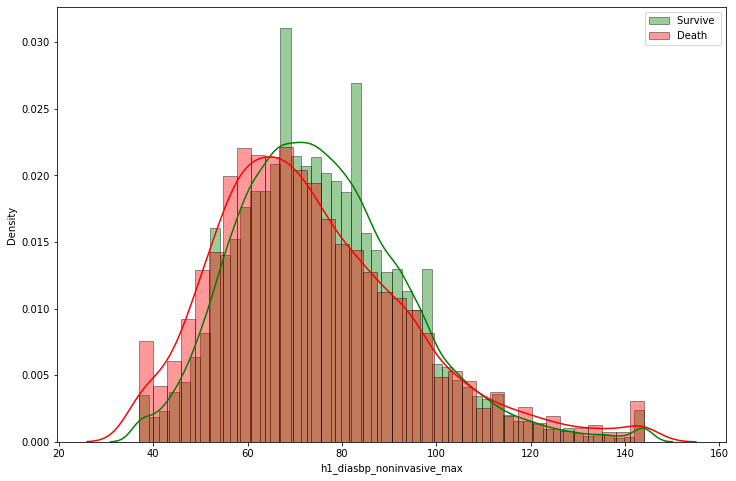

_______________________________________________________________________________
H1_DIASBP_NONINVASIVE_MIN

30147     66.0
56296    112.0
1974      86.0
25438     64.0
79125     64.0
Name: h1_diasbp_noninvasive_min, dtype: float64

Description: The patient:s lowest diastolic blood pressure during the first hour of their unit stay, invasively measured


Number of Null values:
5892

Value Counts:
60.0     1837
58.0     1804
55.0     1784
56.0     1742
59.0     1733
62.0     1692
57.0     1661
65.0     1653
63.0     1616
61.0     1604
67.0     1551
64.0     1528
66.0     1527
54.0     1514
70.0     1481
68.0     1464
53.0     1456
52.0     1417
50.0     1415
51.0     1407
69.0     1351
72.0     1315
74.0     1313
71.0     1290
73.0     1233
49.0     1200
75.0     1108
76.0     1101
48.0     1086
47.0     1078
77.0     1008
46.0      995
78.0      976
79.0      946
45.0      931
80.0      894
44.0      887
81.0      784
82.0      761
83.0      736
43.0      734
42.0      699
84.0      693
4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

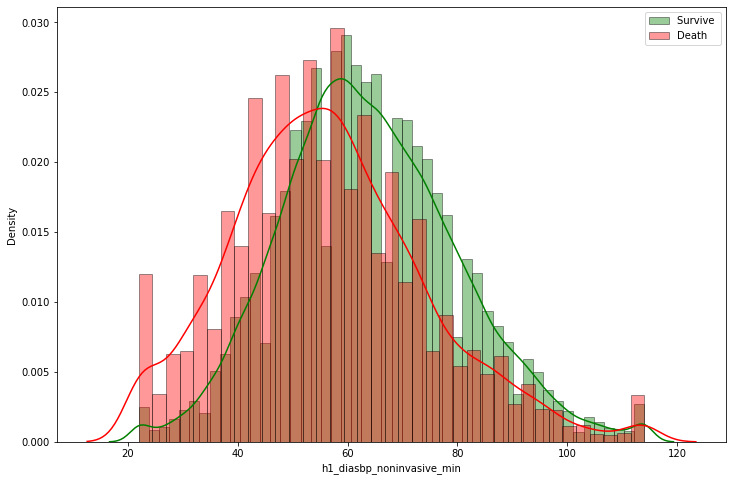

_______________________________________________________________________________
H1_HEARTRATE_MAX

30147     65.0
56296     87.0
1974      72.0
25438    113.0
79125     92.0
Name: h1_heartrate_max, dtype: float64

Description: The patient's highest heart rate during the first hour of their unit stay


Number of Null values:
2247

Value Counts:
80.0     1861
88.0     1497
84.0     1489
86.0     1482
90.0     1476
82.0     1454
92.0     1432
96.0     1397
94.0     1321
76.0     1313
98.0     1300
78.0     1288
87.0     1237
100.0    1235
81.0     1197
72.0     1193
85.0     1170
93.0     1163
70.0     1162
74.0     1142
89.0     1141
83.0     1135
79.0     1134
91.0     1117
102.0    1112
77.0     1101
75.0     1092
95.0     1027
73.0     1018
106.0    1002
97.0      998
68.0      990
104.0     981
71.0      964
101.0     945
108.0     944
110.0     904
99.0      898
105.0     872
103.0     858
112.0     832
107.0     783
69.0      775
66.0      743
114.0     743
65.0      742
64.0      7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

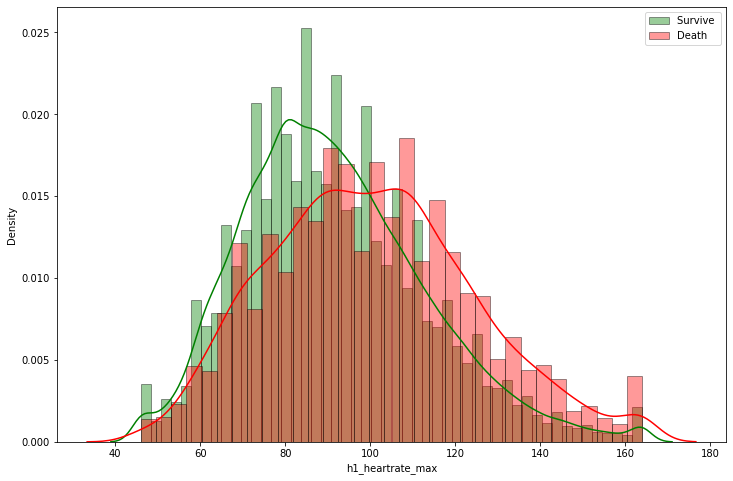

_______________________________________________________________________________
H1_HEARTRATE_MIN

30147     59.0
56296     80.0
1974      66.0
25438    102.0
79125     92.0
Name: h1_heartrate_min, dtype: float64

Description: The patient's lowest heart rate during the first hour of their unit stay


Number of Null values:
2247

Value Counts:
80.0     1994
70.0     1705
78.0     1533
84.0     1499
74.0     1499
82.0     1472
76.0     1459
60.0     1452
68.0     1442
72.0     1435
90.0     1410
88.0     1345
86.0     1327
79.0     1259
75.0     1246
73.0     1235
77.0     1221
66.0     1209
71.0     1207
81.0     1194
83.0     1189
64.0     1188
92.0     1187
94.0     1152
85.0     1152
69.0     1136
96.0     1115
62.0     1114
89.0     1111
87.0     1068
98.0     1062
100.0    1033
67.0     1018
65.0      996
91.0      991
93.0      969
95.0      902
63.0      883
102.0     876
97.0      868
61.0      840
104.0     786
58.0      784
99.0      781
101.0     752
106.0     743
59.0      73

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

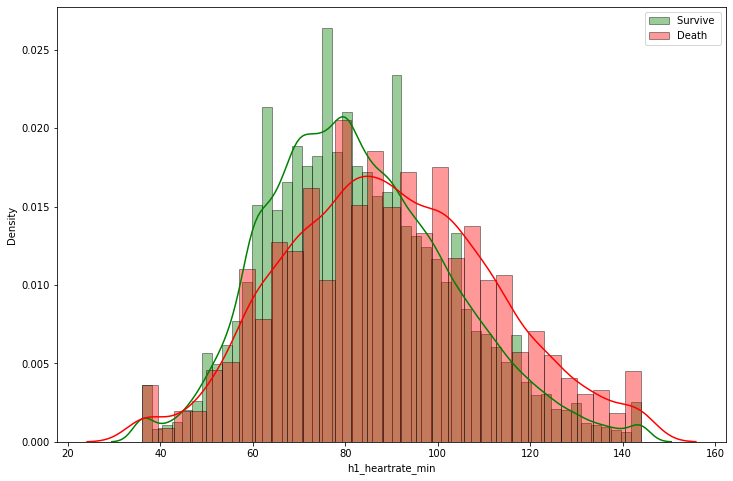

_______________________________________________________________________________
H1_MBP_MAX

30147     89.0
56296    156.0
1974     100.0
25438     83.0
79125     76.0
Name: h1_mbp_max, dtype: float64

Description: The patient's highest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3764

Value Counts:
88.0     1499
91.0     1418
86.0     1413
85.0     1408
79.0     1405
80.0     1404
83.0     1399
87.0     1396
82.0     1392
90.0     1389
84.0     1381
92.0     1367
78.0     1361
81.0     1336
89.0     1334
93.0     1328
94.0     1323
96.0     1316
76.0     1293
95.0     1283
97.0     1282
77.0     1276
74.0     1263
98.0     1227
75.0     1200
73.0     1117
100.0    1116
101.0    1096
72.0     1087
99.0     1086
102.0    1077
71.0     1049
104.0     993
70.0      968
103.0     967
105.0     960
69.0      884
106.0     852
68.0      848
107.0     848
108.0     808
112.0     761
109.0     752
67.0      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

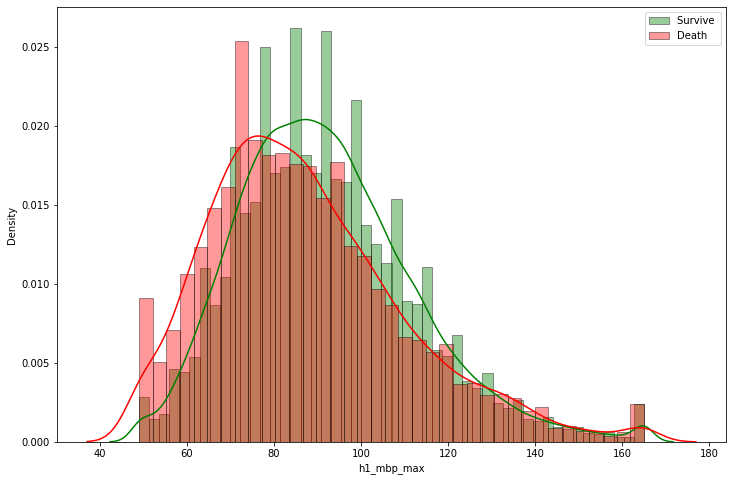

_______________________________________________________________________________
H1_MBP_MIN

30147     89.0
56296    124.0
1974     100.0
25438     75.0
79125     72.0
Name: h1_mbp_min, dtype: float64

Description: The patient's lowest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
3764

Value Counts:
80.0     1582
74.0     1548
79.0     1503
73.0     1500
76.0     1496
78.0     1477
81.0     1451
70.0     1447
77.0     1429
75.0     1422
71.0     1408
72.0     1404
82.0     1404
69.0     1365
68.0     1364
67.0     1345
84.0     1345
66.0     1304
85.0     1302
83.0     1297
87.0     1271
88.0     1270
86.0     1259
65.0     1256
64.0     1230
89.0     1159
62.0     1129
63.0     1125
90.0     1105
91.0     1102
92.0     1070
94.0      987
61.0      984
60.0      977
93.0      971
96.0      916
59.0      916
97.0      903
95.0      902
58.0      878
57.0      816
98.0      812
99.0      736
100.0     7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

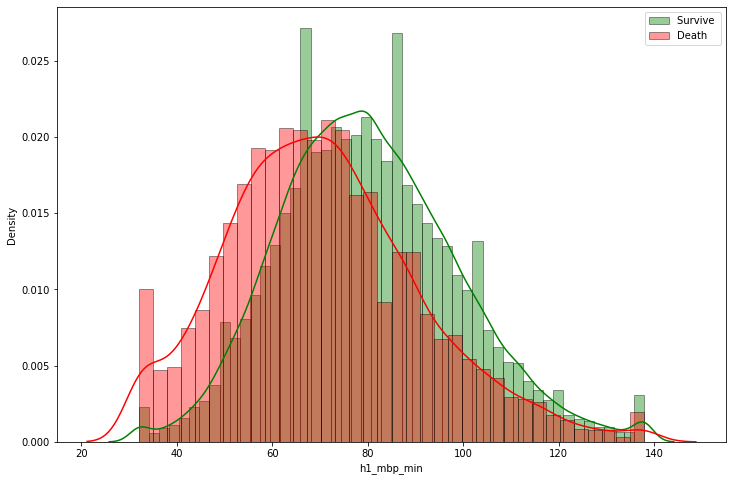

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MAX

30147     89.0
56296    156.0
1974     100.0
25438     83.0
79125     76.0
Name: h1_mbp_noninvasive_max, dtype: float64

Description: The patient's :ighest mean blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
7295

Value Counts:
88.0     1408
79.0     1348
85.0     1344
91.0     1339
87.0     1323
86.0     1318
83.0     1316
80.0     1294
90.0     1286
82.0     1276
81.0     1274
89.0     1273
93.0     1272
84.0     1272
92.0     1264
78.0     1254
97.0     1237
96.0     1228
94.0     1224
95.0     1223
77.0     1220
76.0     1205
75.0     1164
74.0     1164
98.0     1145
73.0     1076
101.0    1069
100.0    1037
99.0     1033
72.0     1014
71.0      999
102.0     993
104.0     938
105.0     932
103.0     927
70.0      907
69.0      861
107.0     821
106.0     810
68.0      804
108.0     765
109.0     737
112.0     719
67.0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

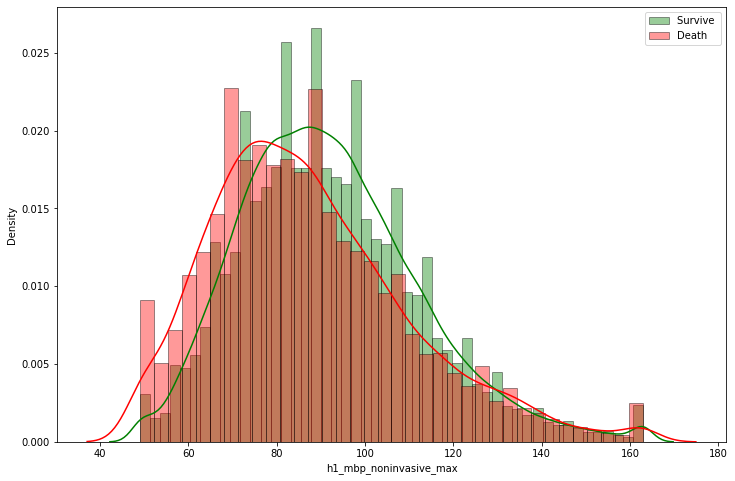

_______________________________________________________________________________
H1_MBP_NONINVASIVE_MIN

30147     89.0
56296    124.0
1974     100.0
25438     75.0
79125     72.0
Name: h1_mbp_noninvasive_min, dtype: float64

Description: The patient's :owest mean blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
7295

Value Counts:
80.0     1499
79.0     1445
74.0     1422
73.0     1421
76.0     1399
81.0     1398
78.0     1387
77.0     1385
75.0     1373
71.0     1348
70.0     1335
82.0     1327
69.0     1312
72.0     1286
84.0     1267
85.0     1260
67.0     1259
83.0     1255
68.0     1242
87.0     1235
88.0     1215
86.0     1199
65.0     1174
66.0     1172
89.0     1126
64.0     1101
91.0     1066
63.0     1049
90.0     1046
92.0     1038
62.0     1015
94.0      949
93.0      943
61.0      919
60.0      885
97.0      882
95.0      880
96.0      878
59.0      872
58.0      799
98.0      775
57.0      762
99.0      710
100.0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

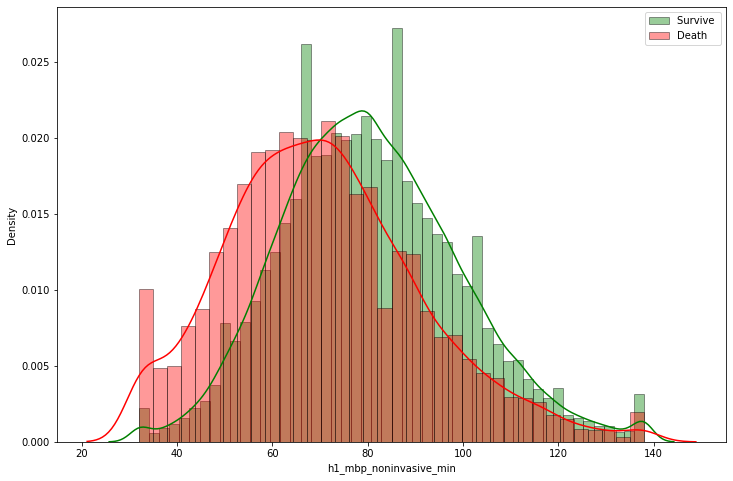

_______________________________________________________________________________
H1_RESPRATE_MAX

30147    16.0
56296    20.0
1974      NaN
25438    26.0
79125    12.0
Name: h1_resprate_max, dtype: float64

Description: The patient's highest respiratory rate during the first hour of their unit stay


Number of Null values:
3494

Value Counts:
20.0    6411
18.0    5893
16.0    4496
22.0    4451
21.0    4112
19.0    4093
24.0    3806
23.0    3445
17.0    3394
25.0    2829
26.0    2642
15.0    2472
14.0    2357
28.0    2216
27.0    2079
30.0    1640
29.0    1556
12.0    1341
32.0    1135
13.0    1054
31.0    1029
33.0     866
34.0     740
35.0     637
10.0     619
36.0     591
37.0     443
38.0     414
40.0     389
59.0     369
39.0     351
11.0     330
41.0     260
42.0     226
44.0     159
43.0     158
45.0     137
46.0     125
47.0     104
48.0      89
49.0      69
50.0      57
51.0      50
52.0      44
55.0      40
54.0      40
53.0      36
57.0      28
56.0      28
58.0      26
Name: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

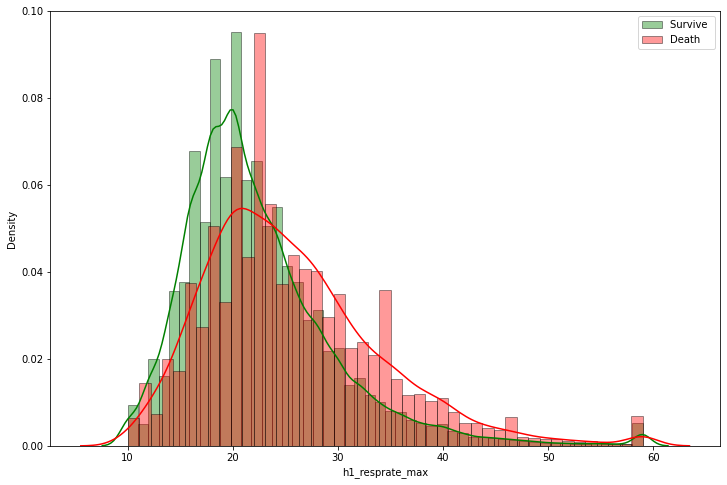

_______________________________________________________________________________
H1_RESPRATE_MIN

30147    15.0
56296    10.0
1974      NaN
25438    16.0
79125    12.0
Name: h1_resprate_min, dtype: float64

Description: The patient's lowest respiratory rate during the first hour of their unit stay


Number of Null values:
3494

Value Counts:
16.0     7284
14.0     6247
18.0     5960
12.0     5328
15.0     5165
20.0     4703
17.0     4301
13.0     3775
19.0     3400
22.0     2594
11.0     2489
21.0     2445
10.0     2308
24.0     1892
23.0     1755
25.0     1205
26.0     1108
9.0      1095
28.0      822
27.0      761
8.0       749
30.0      549
0.0       498
29.0      482
7.0       395
32.0      360
31.0      304
6.0       256
33.0      232
34.0      187
35.0      179
36.0      145
5.0       135
37.0       95
38.0       84
4.0        82
40.0       69
39.0       62
3.0        50
41.0       44
1.0        33
42.0       32
44.0       31
2.0        29
43.0       24
46.0       19
47.0       11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

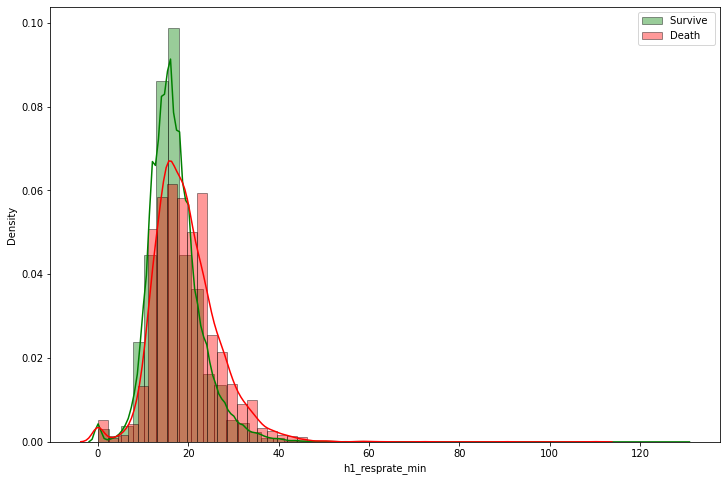

_______________________________________________________________________________
H1_SPO2_MAX

30147     93.0
56296    100.0
1974      97.0
25438     98.0
79125     98.0
Name: h1_spo2_max, dtype: float64

Description: The patient's highest peripheral oxygen saturation during the first hour of their unit stay


Number of Null values:
3361

Value Counts:
100.0    28795
99.0     10260
98.0      9124
97.0      7266
96.0      5448
95.0      3572
94.0      2242
93.0      1247
92.0       784
91.0       386
90.0       236
89.0       122
88.0        92
86.0        57
87.0        53
85.0        32
83.0        28
84.0        27
82.0        26
80.0        24
81.0        16
78.0        16
76.0        16
77.0        14
79.0        14
75.0        10
72.0         9
0.0          8
69.0         6
74.0         6
70.0         5
73.0         4
71.0         4
68.0         4
28.0         3
66.0         3
64.0         3
62.0         3
65.0         3
52.0         3
53.0         2
2.0          2
57.0         2
35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

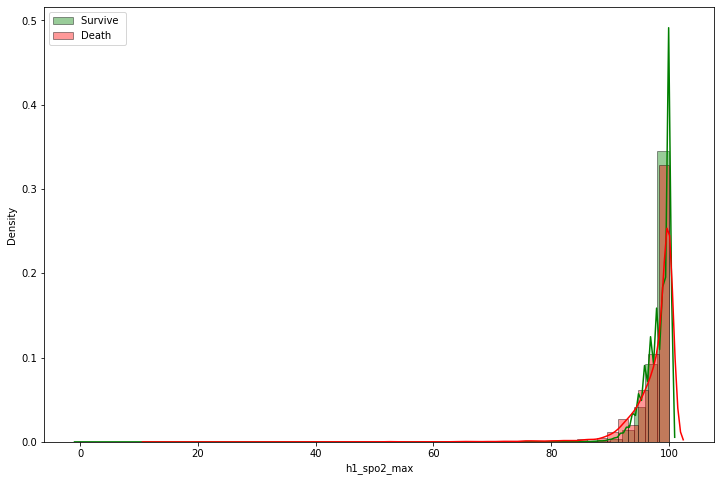

_______________________________________________________________________________
H1_SPO2_MIN

30147     92.0
56296    100.0
1974      96.0
25438     96.0
79125     88.0
Name: h1_spo2_min, dtype: float64

Description: The patient's lowest peripheral oxygen saturation during the first hour of their unit stay


Number of Null values:
3361

Value Counts:
100.0    11454
97.0      7840
98.0      7733
96.0      7544
99.0      6898
95.0      6679
94.0      5366
93.0      4211
92.0      3113
91.0      2162
90.0      1629
89.0       967
88.0       749
87.0       537
86.0       428
85.0       349
84.0       271
83.0       221
82.0       214
81.0       165
80.0       160
78.0       113
79.0       111
77.0       100
75.0        73
76.0        73
73.0        67
70.0        51
74.0        47
71.0        46
0.0         45
72.0        44
69.0        39
68.0        35
66.0        29
67.0        27
50.0        24
60.0        23
64.0        21
65.0        17
62.0        16
61.0        15
63.0        14
2.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

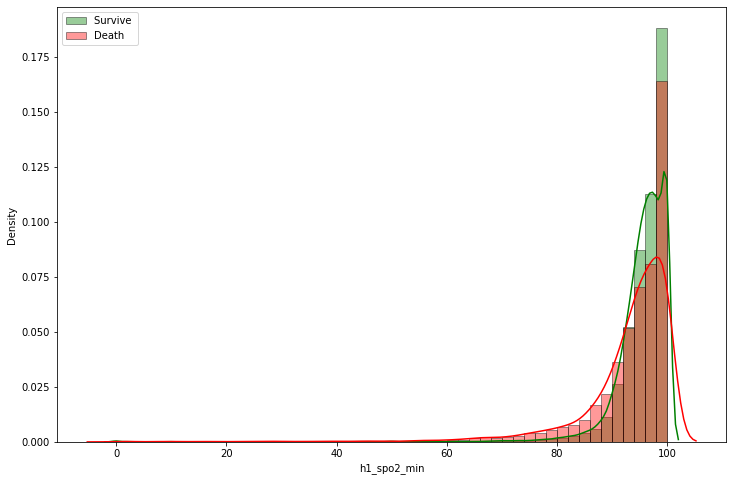

_______________________________________________________________________________
H1_SYSBP_MAX

30147    143.0
56296    216.0
1974     183.0
25438    147.0
79125    112.0
Name: h1_sysbp_max, dtype: float64

Description: The patient's highest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
2918

Value Counts:
118.0    1090
124.0    1083
122.0    1067
125.0    1063
127.0    1043
130.0    1039
119.0    1034
128.0    1034
132.0    1031
140.0    1025
115.0    1016
123.0    1013
120.0    1012
116.0    1004
129.0     996
134.0     992
133.0     987
136.0     985
117.0     985
131.0     985
126.0     979
114.0     977
121.0     965
135.0     963
110.0     953
138.0     951
112.0     943
113.0     929
137.0     915
111.0     905
144.0     897
139.0     879
142.0     870
143.0     857
146.0     845
141.0     835
109.0     832
106.0     830
108.0     818
107.0     802
145.0     793
150.0     793
147.0     793
14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

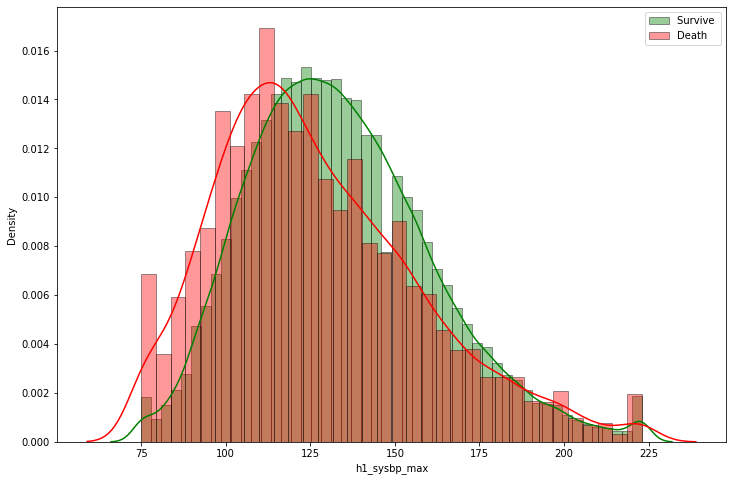

_______________________________________________________________________________
H1_SYSBP_MIN

30147    115.0
56296    171.0
1974     183.0
25438    119.0
79125    112.0
Name: h1_sysbp_min, dtype: float64

Description: The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured


Number of Null values:
2918

Value Counts:
110.0    1144
118.0    1120
106.0    1117
112.0    1112
115.0    1104
104.0    1088
114.0    1088
102.0    1066
105.0    1056
100.0    1046
111.0    1043
113.0    1039
121.0    1038
119.0    1035
120.0    1013
108.0    1013
109.0    1005
117.0    1005
103.0    1004
116.0    1002
122.0     985
101.0     977
107.0     976
98.0      954
99.0      950
124.0     945
125.0     941
96.0      922
123.0     907
128.0     890
94.0      884
95.0      882
92.0      867
126.0     862
130.0     852
127.0     844
97.0      839
90.0      831
133.0     830
93.0      828
132.0     798
91.0      798
129.0     792
135

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

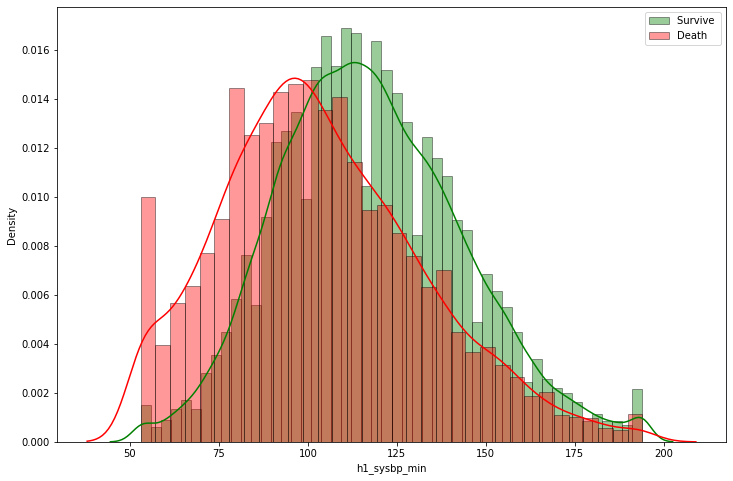

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MAX

30147    143.0
56296    216.0
1974     183.0
25438    147.0
79125    112.0
Name: h1_sysbp_noninvasive_max, dtype: float64

Description: The patient's highest systolic blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
5885

Value Counts:
118.0    1039
122.0    1014
119.0    1013
125.0    1009
124.0    1005
127.0    1002
115.0     994
128.0     986
123.0     974
130.0     971
116.0     965
140.0     964
132.0     962
117.0     962
133.0     956
129.0     952
120.0     944
131.0     943
121.0     934
136.0     931
134.0     928
114.0     926
135.0     923
110.0     915
126.0     911
138.0     902
112.0     897
113.0     885
111.0     883
137.0     873
139.0     848
144.0     840
142.0     817
143.0     817
109.0     814
141.0     797
106.0     794
146.0     787
108.0     782
107.0     776
145.0     762
147.0     759
148.0     745

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

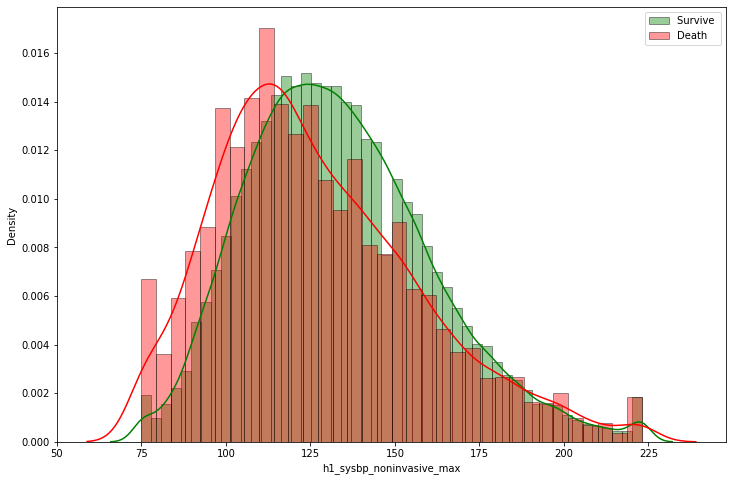

_______________________________________________________________________________
H1_SYSBP_NONINVASIVE_MIN

30147    115.0
56296    171.0
1974     183.0
25438    119.0
79125    112.0
Name: h1_sysbp_noninvasive_min, dtype: float64

Description: The patient's lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured


Number of Null values:
5885

Value Counts:
110.0    1080
115.0    1076
118.0    1070
112.0    1050
106.0    1050
114.0    1029
104.0    1024
111.0    1018
105.0    1015
102.0    1014
119.0    1009
113.0    1002
121.0    1001
100.0     986
117.0     971
103.0     963
120.0     962
109.0     961
108.0     960
122.0     944
116.0     940
101.0     934
107.0     926
125.0     915
99.0      907
124.0     898
98.0      889
123.0     872
128.0     860
96.0      850
95.0      847
130.0     827
127.0     820
94.0      819
126.0     817
92.0      808
97.0      805
133.0     804
93.0      790
90.0      782
91.0      761
132.0     761
135.0     759


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

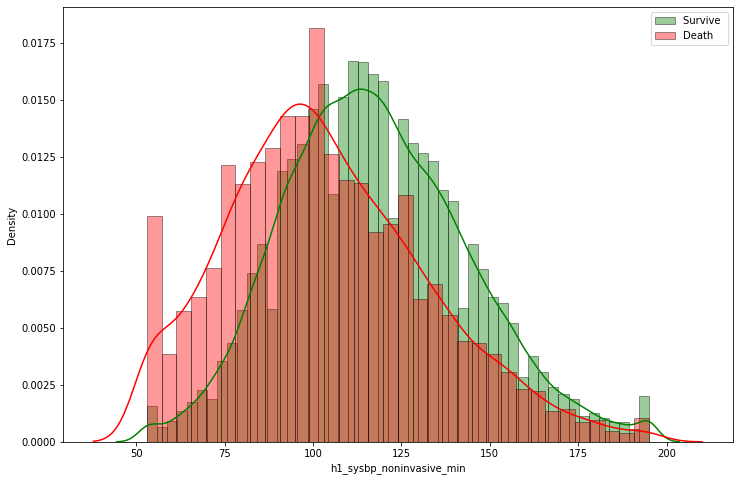

_______________________________________________________________________________
D1_GLUCOSE_MAX

30147    155.0
56296     88.0
1974     153.0
25438    140.0
79125    159.0
Name: d1_glucose_max, dtype: float64

Description: The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
4702

Value Counts:
107.0    603
112.0    602
122.0    601
113.0    595
114.0    573
        ... 
553.0      1
589.0      1
610.0      1
541.0      1
548.0      1
Name: d1_glucose_max, Length: 537, dtype: int64

count    68668.000000
mean       174.501121
std         86.516105
min         73.000000
25%        117.000000
50%        150.000000
75%        201.000000
max        611.000000
Name: d1_glucose_max, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 1466
Identified outliers: 1466
Non-outlier observations: 67202
Total percentual of Outliers:  2.1815



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

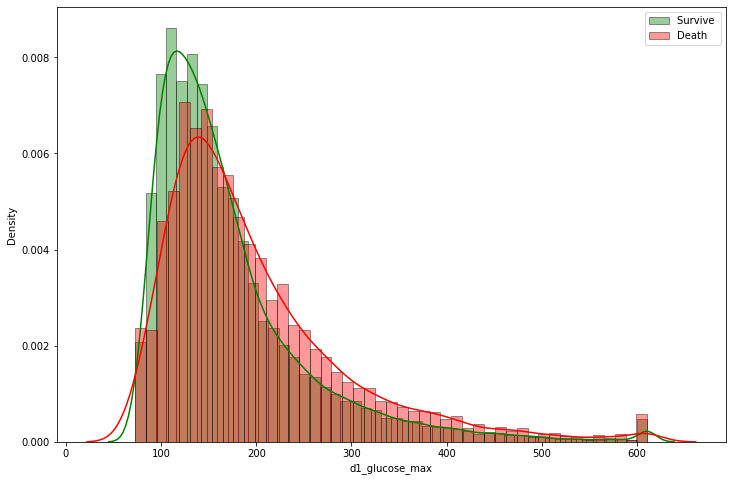

_______________________________________________________________________________
D1_GLUCOSE_MIN

30147    102.0
56296     88.0
1974     112.0
25438    140.0
79125    115.0
Name: d1_glucose_min, dtype: float64

Description: The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
4702

Value Counts:
97.0     1108
96.0     1107
102.0    1066
95.0     1046
98.0     1038
92.0     1024
100.0    1023
99.0     1016
94.0     1006
104.0    1005
101.0    1005
91.0     1003
93.0     1002
106.0     994
103.0     971
105.0     970
107.0     947
109.0     937
90.0      934
108.0     928
88.0      911
110.0     905
113.0     895
87.0      892
86.0      883
111.0     875
112.0     872
89.0      862
85.0      834
114.0     823
115.0     800
117.0     787
116.0     767
84.0      763
119.0     737
118.0     726
120.0     705
82.0      705
121.0     693
122.0     682
83.0      673
124.0     671
127.0     628
81.0      622

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

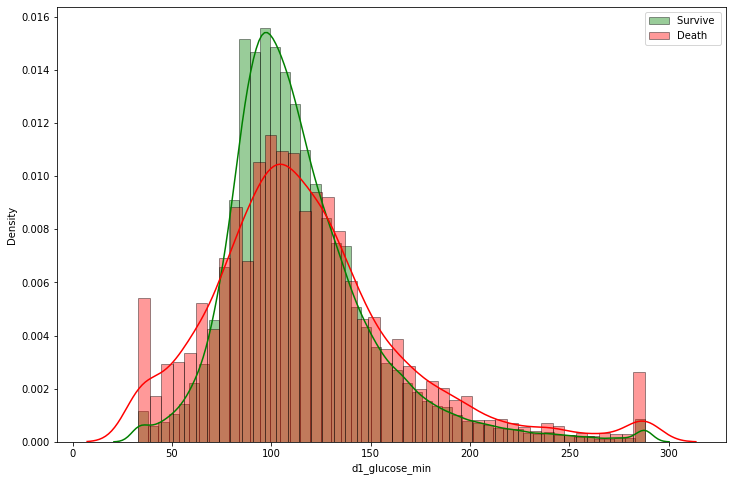

_______________________________________________________________________________
D1_POTASSIUM_MAX

30147    4.6
56296    3.5
1974     3.6
25438    4.3
79125    3.6
Name: d1_potassium_max, dtype: float64

Description: The highest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
7772

Value Counts:
4.00    5046
4.10    5031
4.20    4807
3.90    4540
4.30    4248
3.80    4219
4.40    3910
4.50    3372
3.70    3364
3.60    2878
4.60    2868
4.70    2330
3.50    2212
4.80    1918
3.40    1630
4.90    1584
5.00    1298
3.30    1130
5.10    1072
5.20     844
3.20     826
5.30     713
5.40     679
3.10     508
5.50     498
5.60     436
2.80     410
5.70     378
5.80     338
3.00     326
7.00     302
5.90     278
6.00     232
6.10     228
2.90     197
6.20     189
6.30     154
6.40     136
6.50     110
6.70      97
6.60      75
6.80      70
6.90      60
4.24       3
4.05       3
4.65       2
4.73       2
4.31  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

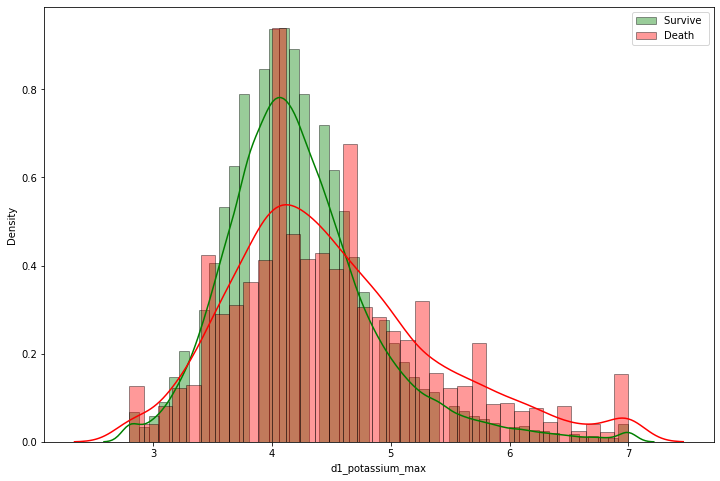

_______________________________________________________________________________
D1_POTASSIUM_MIN

30147    4.2
56296    3.5
1974     3.3
25438    4.2
79125    2.4
Name: d1_potassium_min, dtype: float64

Description: The lowest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay


Number of Null values:
7772

Value Counts:
3.90    5070
3.80    5027
4.00    4932
3.70    4658
4.10    4467
4.20    4120
3.60    4095
3.50    3604
4.30    3341
3.40    2998
4.40    2873
3.30    2428
4.50    2308
4.60    1909
3.20    1880
4.70    1452
3.10    1395
4.80    1139
3.00    1002
4.90     882
2.90     796
5.00     743
5.10     617
2.80     582
5.20     490
2.40     446
5.30     361
2.70     359
5.80     306
5.40     288
2.60     244
5.50     216
2.50     187
5.60     162
5.70     134
3.59       3
3.57       3
3.49       3
3.88       2
4.05       2
3.64       2
3.93       2
4.27       2
4.37       2
3.21       2
3.05       2
3.53       2
4.15   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

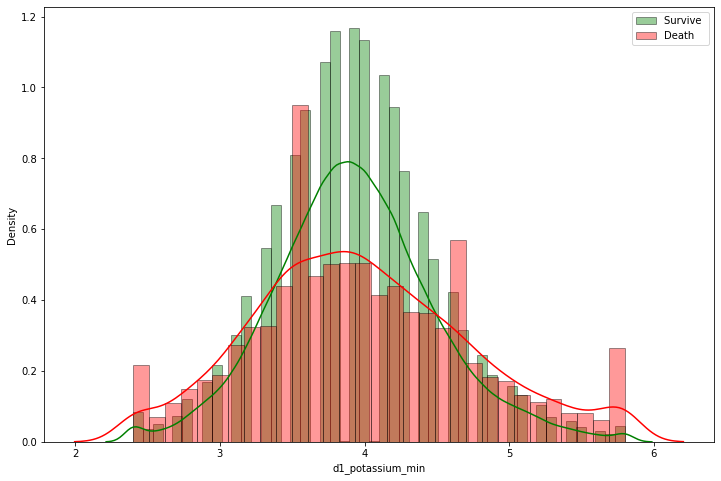

_______________________________________________________________________________
APACHE_4A_HOSPITAL_DEATH_PROB

30147     NaN
56296    0.04
1974     0.07
25438     NaN
79125    0.81
Name: apache_4a_hospital_death_prob, dtype: float64

Description: The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.


Number of Null values:
6393

Value Counts:
 0.01    8821
 0.02    7944
 0.03    5948
 0.04    4809
 0.05    3922
 0.06    3084
 0.07    2590
 0.08    2228
 0.00    1978
 0.09    1912
-1.00    1883
 0.10    1643
 0.11    1538
 0.12    1354
 0.13    1163
 0.14     964
 0.15     880
 0.16     844
 0.17     783
 0.18     715
 0.19     618
 0.20     570
 0.21     558
 0.22     446
 0.24     424
 0.23     411
 0.25     393
 0.27     359
 0.26     355
 0.28     348
 0.29     309
 0.30     264
 0.31     262
 0.32     254
 0.34     237
 0.33     220
 0.36     219
 0.39     208
 0.35     203
 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

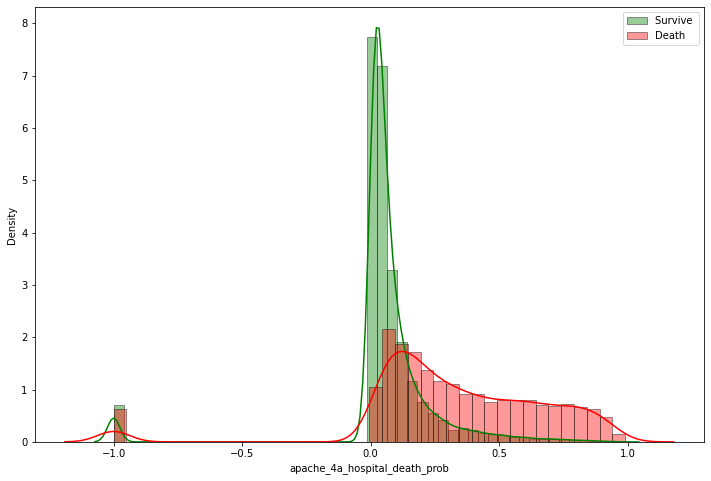

_______________________________________________________________________________
APACHE_4A_ICU_DEATH_PROB

30147     NaN
56296    0.02
1974     0.03
25438     NaN
79125    0.76
Name: apache_4a_icu_death_prob, dtype: float64

Description: The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis


Number of Null values:
6393

Value Counts:
 0.01    16820
 0.02     9431
 0.00     7718
 0.03     5796
 0.04     4088
 0.05     2985
 0.06     2220
-1.00     1776
 0.07     1704
 0.08     1410
 0.09     1100
 0.10      933
 0.11      816
 0.12      721
 0.13      571
 0.14      506
 0.15      481
 0.16      429
 0.17      401
 0.18      339
 0.19      317
 0.20      306
 0.21      290
 0.22      275
 0.23      230
 0.24      225
 0.25      219
 0.26      194
 0.28      192
 0.29      175
 0.33      164
 0.30      163
 0.27      159
 0.31      157
 0.32      147
 0.35      136
 0.34      128
 0.37    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an a

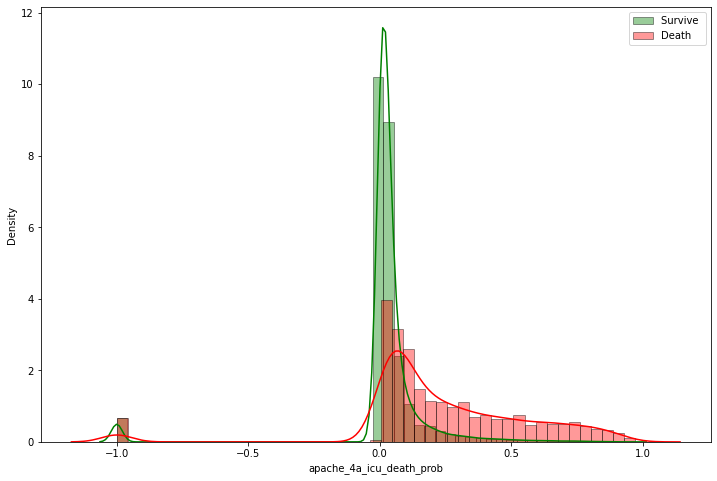

_______________________________________________________________________________
AIDS

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: aids, dtype: float64

Description: Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)


Number of Null values:
564

Value Counts:
0.0    72752
1.0       54
Name: aids, dtype: int64

count    72806.000000
mean         0.000742
std          0.027224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: aids, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 54
Identified outliers: 54
Non-outlier observations: 72752
Total percentual of Outliers:  0.0742



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


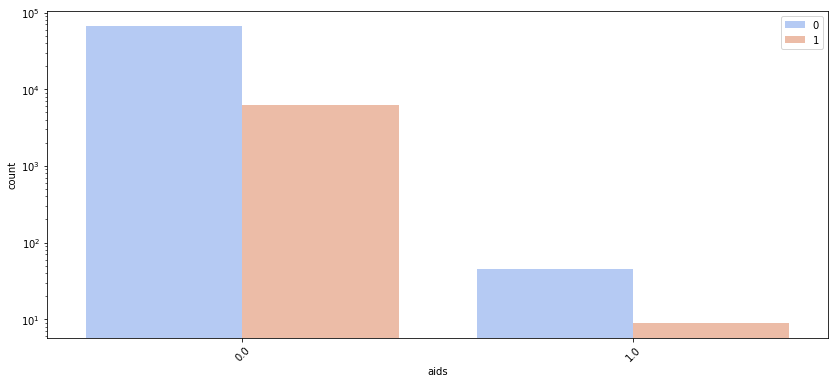

_______________________________________________________________________________
CIRRHOSIS

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: cirrhosis, dtype: float64

Description: Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.


Number of Null values:
564

Value Counts:
0.0    71663
1.0     1143
Name: cirrhosis, dtype: int64

count    72806.000000
mean         0.015699
std          0.124310
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cirrhosis, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 1143
Identified outliers: 1143
Non-outlier observations: 71663
Total percentual of Outliers:  1.595



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


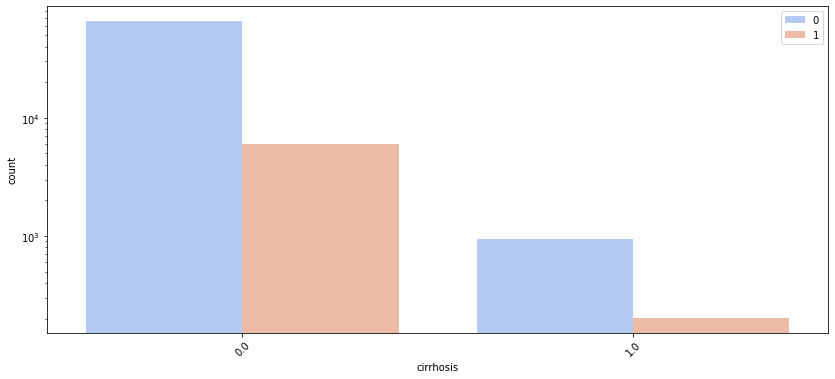

_______________________________________________________________________________
DIABETES_MELLITUS

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: diabetes_mellitus, dtype: float64

Description: Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.


Number of Null values:
564

Value Counts:
0.0    56360
1.0    16446
Name: diabetes_mellitus, dtype: int64

count    72806.000000
mean         0.225888
std          0.418169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes_mellitus, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 0
Identified outliers: 0
Non-outlier observations: 72806
Total percentual of Outliers:  0.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


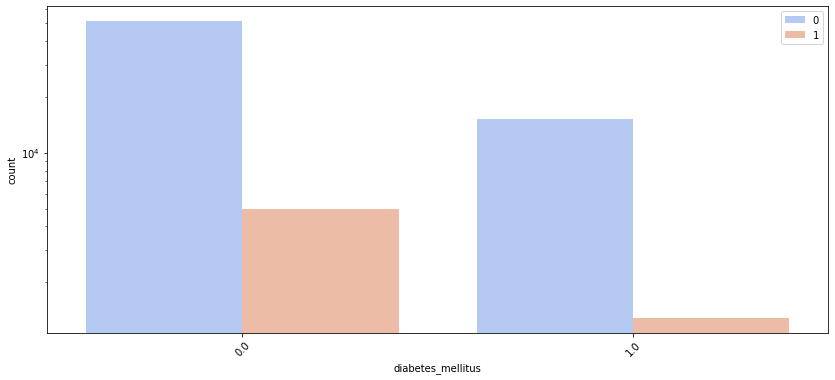

_______________________________________________________________________________
HEPATIC_FAILURE

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: hepatic_failure, dtype: float64

Description: Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.


Number of Null values:
564

Value Counts:
0.0    71885
1.0      921
Name: hepatic_failure, dtype: int64

count    72806.00000
mean         0.01265
std          0.11176
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: hepatic_failure, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 921
Identified outliers: 921
Non-outlier observations: 71885
Total percentual of Outliers:  1.2812



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


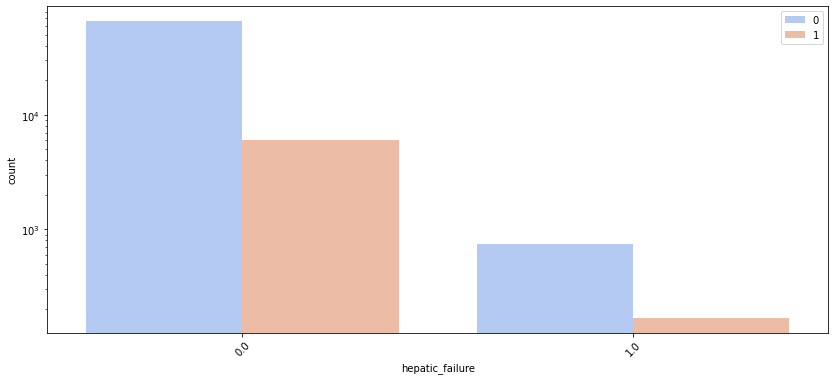

_______________________________________________________________________________
IMMUNOSUPPRESSION

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: immunosuppression, dtype: float64

Description: Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).


Number of Null values:
564

Value Counts:
0.0    70907
1.0     1899
Name: immunosuppression, dtype: int64

count    72806.000000
mean         0.026083
std          0.159383
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: immunosuppression, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 1899
Identified outliers: 1899
Non-outlier observations: 70907
Total percentual of Out

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


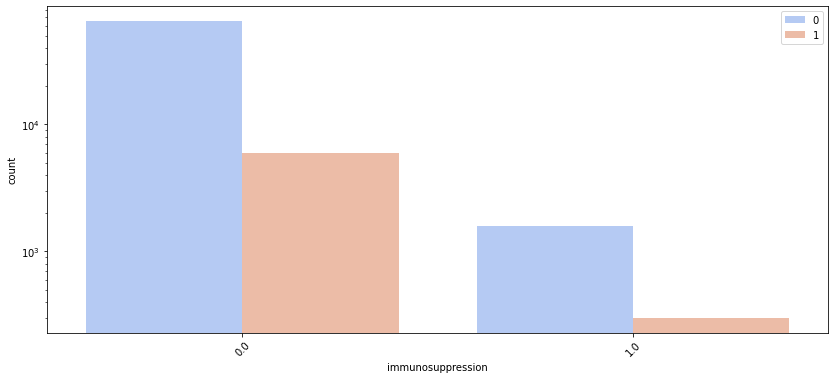

_______________________________________________________________________________
LEUKEMIA

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: leukemia, dtype: float64

Description: Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.


Number of Null values:
564

Value Counts:
0.0    72298
1.0      508
Name: leukemia, dtype: int64

count    72806.000000
mean         0.006977
std          0.083240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: leukemia, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 508
Identified outliers: 508
Non-outlier observations: 72298
Total percentual of Outliers:  0.7026



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


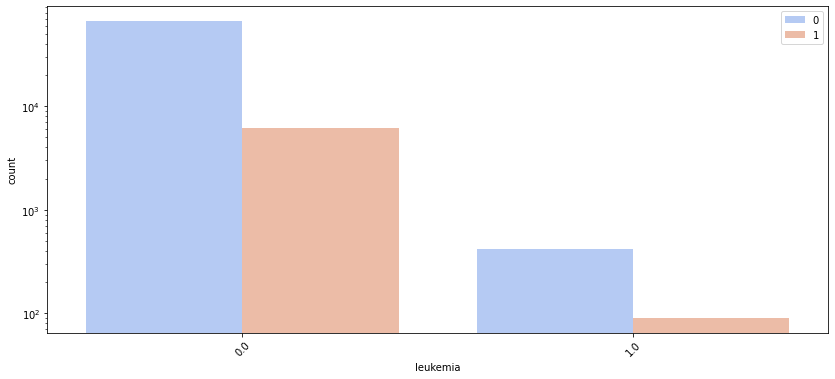

_______________________________________________________________________________
LYMPHOMA

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: lymphoma, dtype: float64

Description: Whether the patient has been diagnosed with non-Hodgkin lymphoma.


Number of Null values:
564

Value Counts:
0.0    72502
1.0      304
Name: lymphoma, dtype: int64

count    72806.000000
mean         0.004175
std          0.064483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: lymphoma, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 304
Identified outliers: 304
Non-outlier observations: 72502
Total percentual of Outliers:  0.4193



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


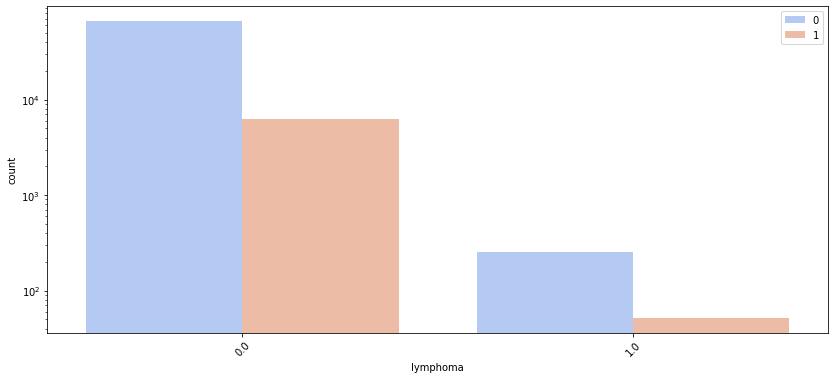

_______________________________________________________________________________
SOLID_TUMOR_WITH_METASTASIS

30147    0.0
56296    0.0
1974     0.0
25438    0.0
79125    0.0
Name: solid_tumor_with_metastasis, dtype: float64

Description: Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.


Number of Null values:
564

Value Counts:
0.0    71285
1.0     1521
Name: solid_tumor_with_metastasis, dtype: int64

count    72806.000000
mean         0.020891
std          0.143021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: solid_tumor_with_metastasis, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 1521
Identified outliers: 1521
Non-outlier observations: 71285
Total percentual of Outliers:  2.1337



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


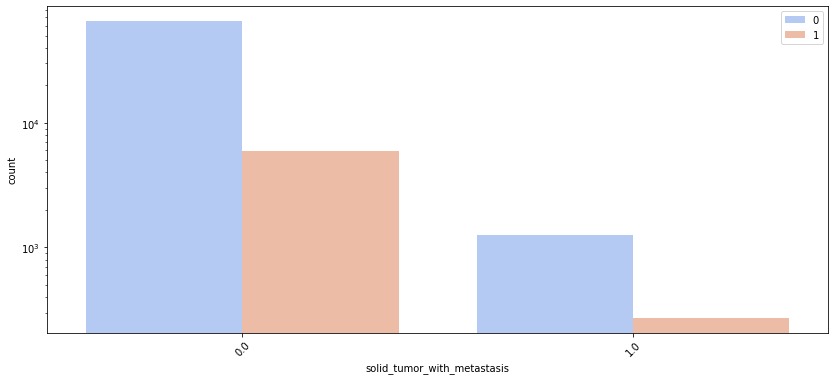

_______________________________________________________________________________
APACHE_3J_BODYSYSTEM

30147    Cardiovascular
56296      Neurological
1974       Neurological
25438    Cardiovascular
79125    Cardiovascular
Name: apache_3j_bodysystem, dtype: object

Description: Admission diagnosis group for APACHE III


Number of Null values:
1333

Value Counts:
Cardiovascular          23969
Neurological             9522
Sepsis                   9376
Respiratory              9281
Gastrointestinal         7255
Metabolic                6153
Trauma                   3055
Genitourinary            1751
Musculoskeletal/Skin      926
Hematological             497
Gynecological             252
Name: apache_3j_bodysystem, dtype: int64

count              72037
unique                11
top       Cardiovascular
freq               23969
Name: apache_3j_bodysystem, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


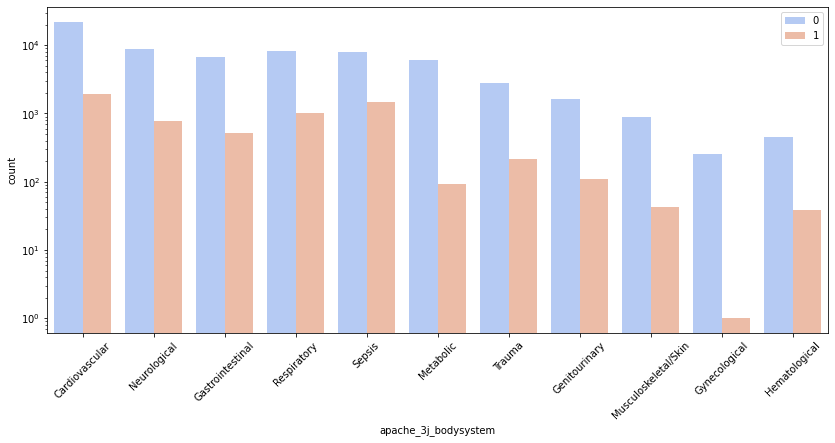

_______________________________________________________________________________
APACHE_2_BODYSYSTEM

30147    Cardiovascular
56296        Neurologic
1974         Neurologic
25438    Cardiovascular
79125    Cardiovascular
Name: apache_2_bodysystem, dtype: object

Description: Admission diagnosis group for APACHE II


Number of Null values:
1333

Value Counts:
Cardiovascular         31004
Neurologic              9522
Respiratory             9281
Gastrointestinal        7255
Metabolic               6153
Trauma                  3055
Undefined diagnoses     3011
Renal/Genitourinary     1982
Haematologic             497
Undefined Diagnoses      277
Name: apache_2_bodysystem, dtype: int64

count              72037
unique                10
top       Cardiovascular
freq               31004
Name: apache_2_bodysystem, dtype: object



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


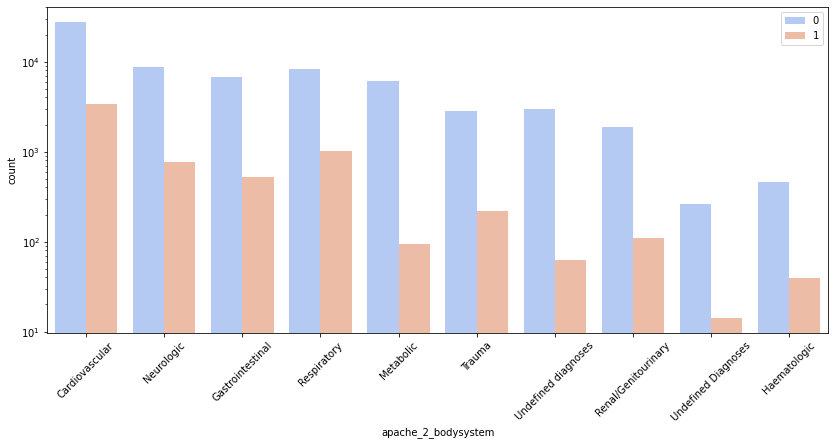

_______________________________________________________________________________
HOSPITAL_DEATH

30147    0
56296    0
1974     0
25438    0
79125    1
Name: hospital_death, dtype: int64

Description: Whether the patient died during this hospitalization


Number of Null values:
0

Value Counts:
0    67038
1     6332
Name: hospital_death, dtype: int64

count    73370.000000
mean         0.086302
std          0.280812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hospital_death, dtype: float64


Identified lowest outliers: 0
Identified upper outliers: 6332
Identified outliers: 6332
Non-outlier observations: 67038
Total percentual of Outliers:  9.4454



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


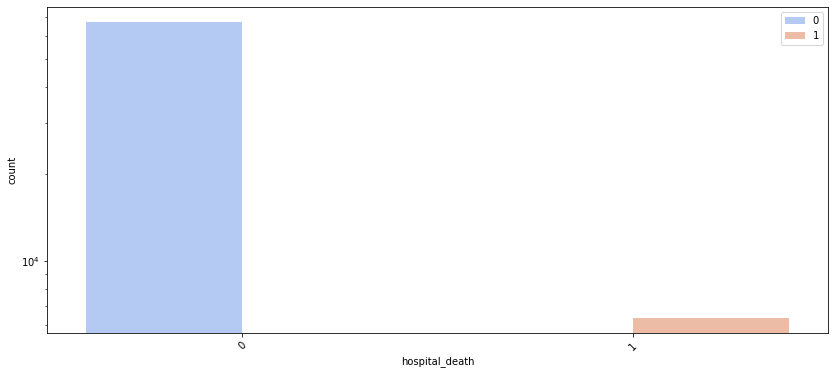

_______________________________________________________________________________


In [39]:
cat_col=[]
num_col=[]

for i in data.columns[3::]: # we omit columns containing id because they dont
                            # contribute to data modelling
    print(i.upper())
    print('')
    print(data[i].head(5))
    
    print('')
    print(f'Description: {dict_description[i]}')
    print('')
    
    
    print('')
    print('Number of Null values:')
    print(data[i].isnull().sum())
    
    print('')
    print('Value Counts:')
    print(data[i].value_counts())
    print('')
    print(data[i].describe(include=all))
    print('')
      

    if data[i].dtype != np.object:
        num_col.append(i)
        print('')
        CalcOutliers(data[i]) 
        print('')
    else:
        cat_col.append(i)
    
    if data[i].value_counts().shape[0]>20:
    
        plt.figure(figsize=(12,8))
        sns.distplot(data[i][data['hospital_death']==0],color='g', label='Survive ',hist_kws={'edgecolor':'black'})
        _=sns.distplot(data[i][data['hospital_death']==1],color='r',label='Death',hist_kws={'edgecolor':'black'})
        plt.legend()
        plt.show()              
        
    else:
        plt.figure(figsize=(14, 6))
        ax = sns.countplot(x=i, hue="hospital_death", data=data, palette='coolwarm')
        legend_labels, _= ax.get_legend_handles_labels()
        ax.legend(legend_labels, ['Survive','Death'], 
          bbox_to_anchor=(1,1))
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.xticks(rotation=45)
        plt.show()
        
    
    print('_______________________________________________________________________________')

I want to further analyze the preconditions and understand which one is the most common to 

In [38]:
num_col

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mb

# General observations

In [74]:
precondition = data.groupby("hospital_death")\
                        .agg({"leukemia":["sum"],
                              "lymphoma":["sum"],"solid_tumor_with_metastasis":["sum"],
                              "immunosuppression":["sum"],"hepatic_failure":["sum"],
                              "diabetes_mellitus":["sum"],"cirrhosis":["sum"],"aids":["sum"]})\
                        .reset_index()
precondition.columns = ["death", "leukemia","lymphoma","solid_tumor_with_metastasis","immunosuppression","hepatic_failure","diabetes_mellitus","cirrhosis","aids"]

In [75]:
precondition.index = precondition.death
precondition = precondition.drop('death',axis=1)

In [76]:
precondition

,leukemia,lymphoma,solid_tumor_with_metastasis,immunosuppression,hepatic_failure,diabetes_mellitus,cirrhosis,aids
death,,,,,,,,
0,417.0,252.0,1248.0,1598.0,752.0,15162.0,939.0,45.0
1,91.0,52.0,273.0,301.0,169.0,1284.0,204.0,9.0


In [79]:
for col in precondition.columns:
  precondition.loc['avg',col] = ((precondition[precondition.index==1][col].values[0])/(precondition[precondition.index==0][col].values[0]))*100

In [80]:
precondition

,leukemia,lymphoma,solid_tumor_with_metastasis,immunosuppression,hepatic_failure,diabetes_mellitus,cirrhosis,aids
death,,,,,,,,
0,417.000000,252.000000,1248.000,1598.000000,752.000000,15162.00000,939.00000,45.0
1,91.000000,52.000000,273.000,301.000000,169.000000,1284.00000,204.00000,9.0
avg,21.822542,20.634921,21.875,18.836045,22.473404,8.46854,21.72524,20.0




*   Some variables are highly correlated. We should do PCA later.
* Cardiovascular disease is the most common diagnosis among people who died.
*	The lowest the BMI, the highest the probability of dying.
*	Hepatic failure is the precondition that has caused more deaths.





# Guardamos en formato pickle para pasar con el modelado

In [40]:
import pickle
# Guardamos en formato pickle los dataframes
X_train.to_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/X_train.pkl')
y_train.to_pickle('/content/drive/MyDrive/Lab_datos/Patient_Survival/y_train.pkl')
# Guardamos las variables categoricas y numericas
pd.DataFrame(cat_col).to_csv('/content/drive/MyDrive/Lab_datos/Patient_Survival/cat_col.csv')
pd.DataFrame(num_col).to_csv('/content/drive/MyDrive/Lab_datos/Patient_Survival/num_col.csv')